#**Assignment - 02**


### DATASET EXPLANATION:

The Bank Management Dataset can be described as below.

Input variables:

Bank client data:

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

Related with the last contact of the current campaign:

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

Other attributes:

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

Social and economic context attributes

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):

21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

So there are total 21 columns and 41188 rows(data entries) in the choosen dataset.

In [63]:
!pip install h2o
%matplotlib inline
import random, os, sys
import pandas
import pprint
import operator
import matplotlib
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.estimators.deeplearning import H2ODeepLearningEstimator
from tabulate import tabulate
from h2o.automl import H2OAutoML
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np

**Loading the data frames**

In [64]:
import seaborn as sns
url = 'https://raw.githubusercontent.com/Pramita0410/ML-Data-Cleaning-and-Feature-Selection/main/bank-additional-full.csv'

corr_data = pd.read_csv(url, sep=';')
data2 = pd.read_csv(url, sep=';')

In [65]:
corr_data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


<ipython-input-66-5e03b3d8b301>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(corr_data.corr(), linewidths=0.9, annot=True, ax=ay, cmap='PuRd')


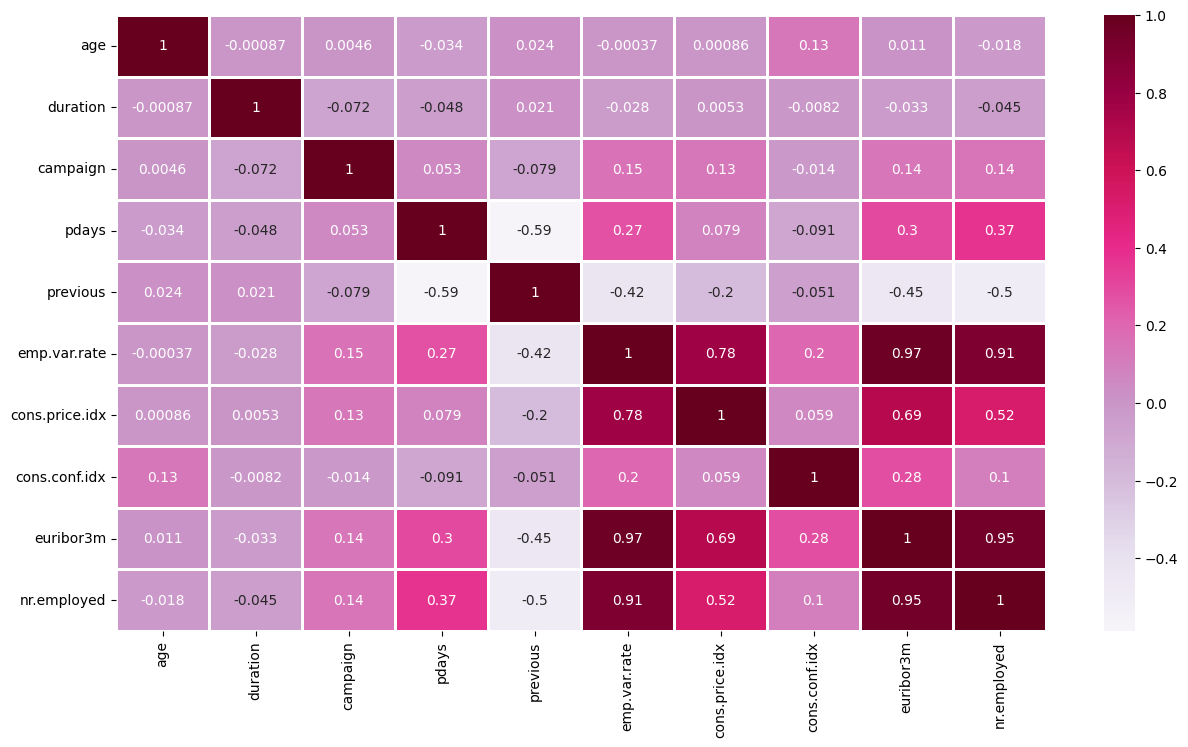

In [66]:
import matplotlib.pyplot as plt
# Create a figure with a specified size
fig, ay = plt.subplots(figsize=(15, 8))

# Generate the heatmap
sns.heatmap(corr_data.corr(), linewidths=0.9, annot=True, ax=ay, cmap='PuRd')

# Show the plot
plt.show()

The correlation heatmap shows that there is very little to no correlation between the independent variables. This suggests that each variable is independent of the others. The closer the values are to 1 and -1, the stronger the positive or negative correlation between two features.





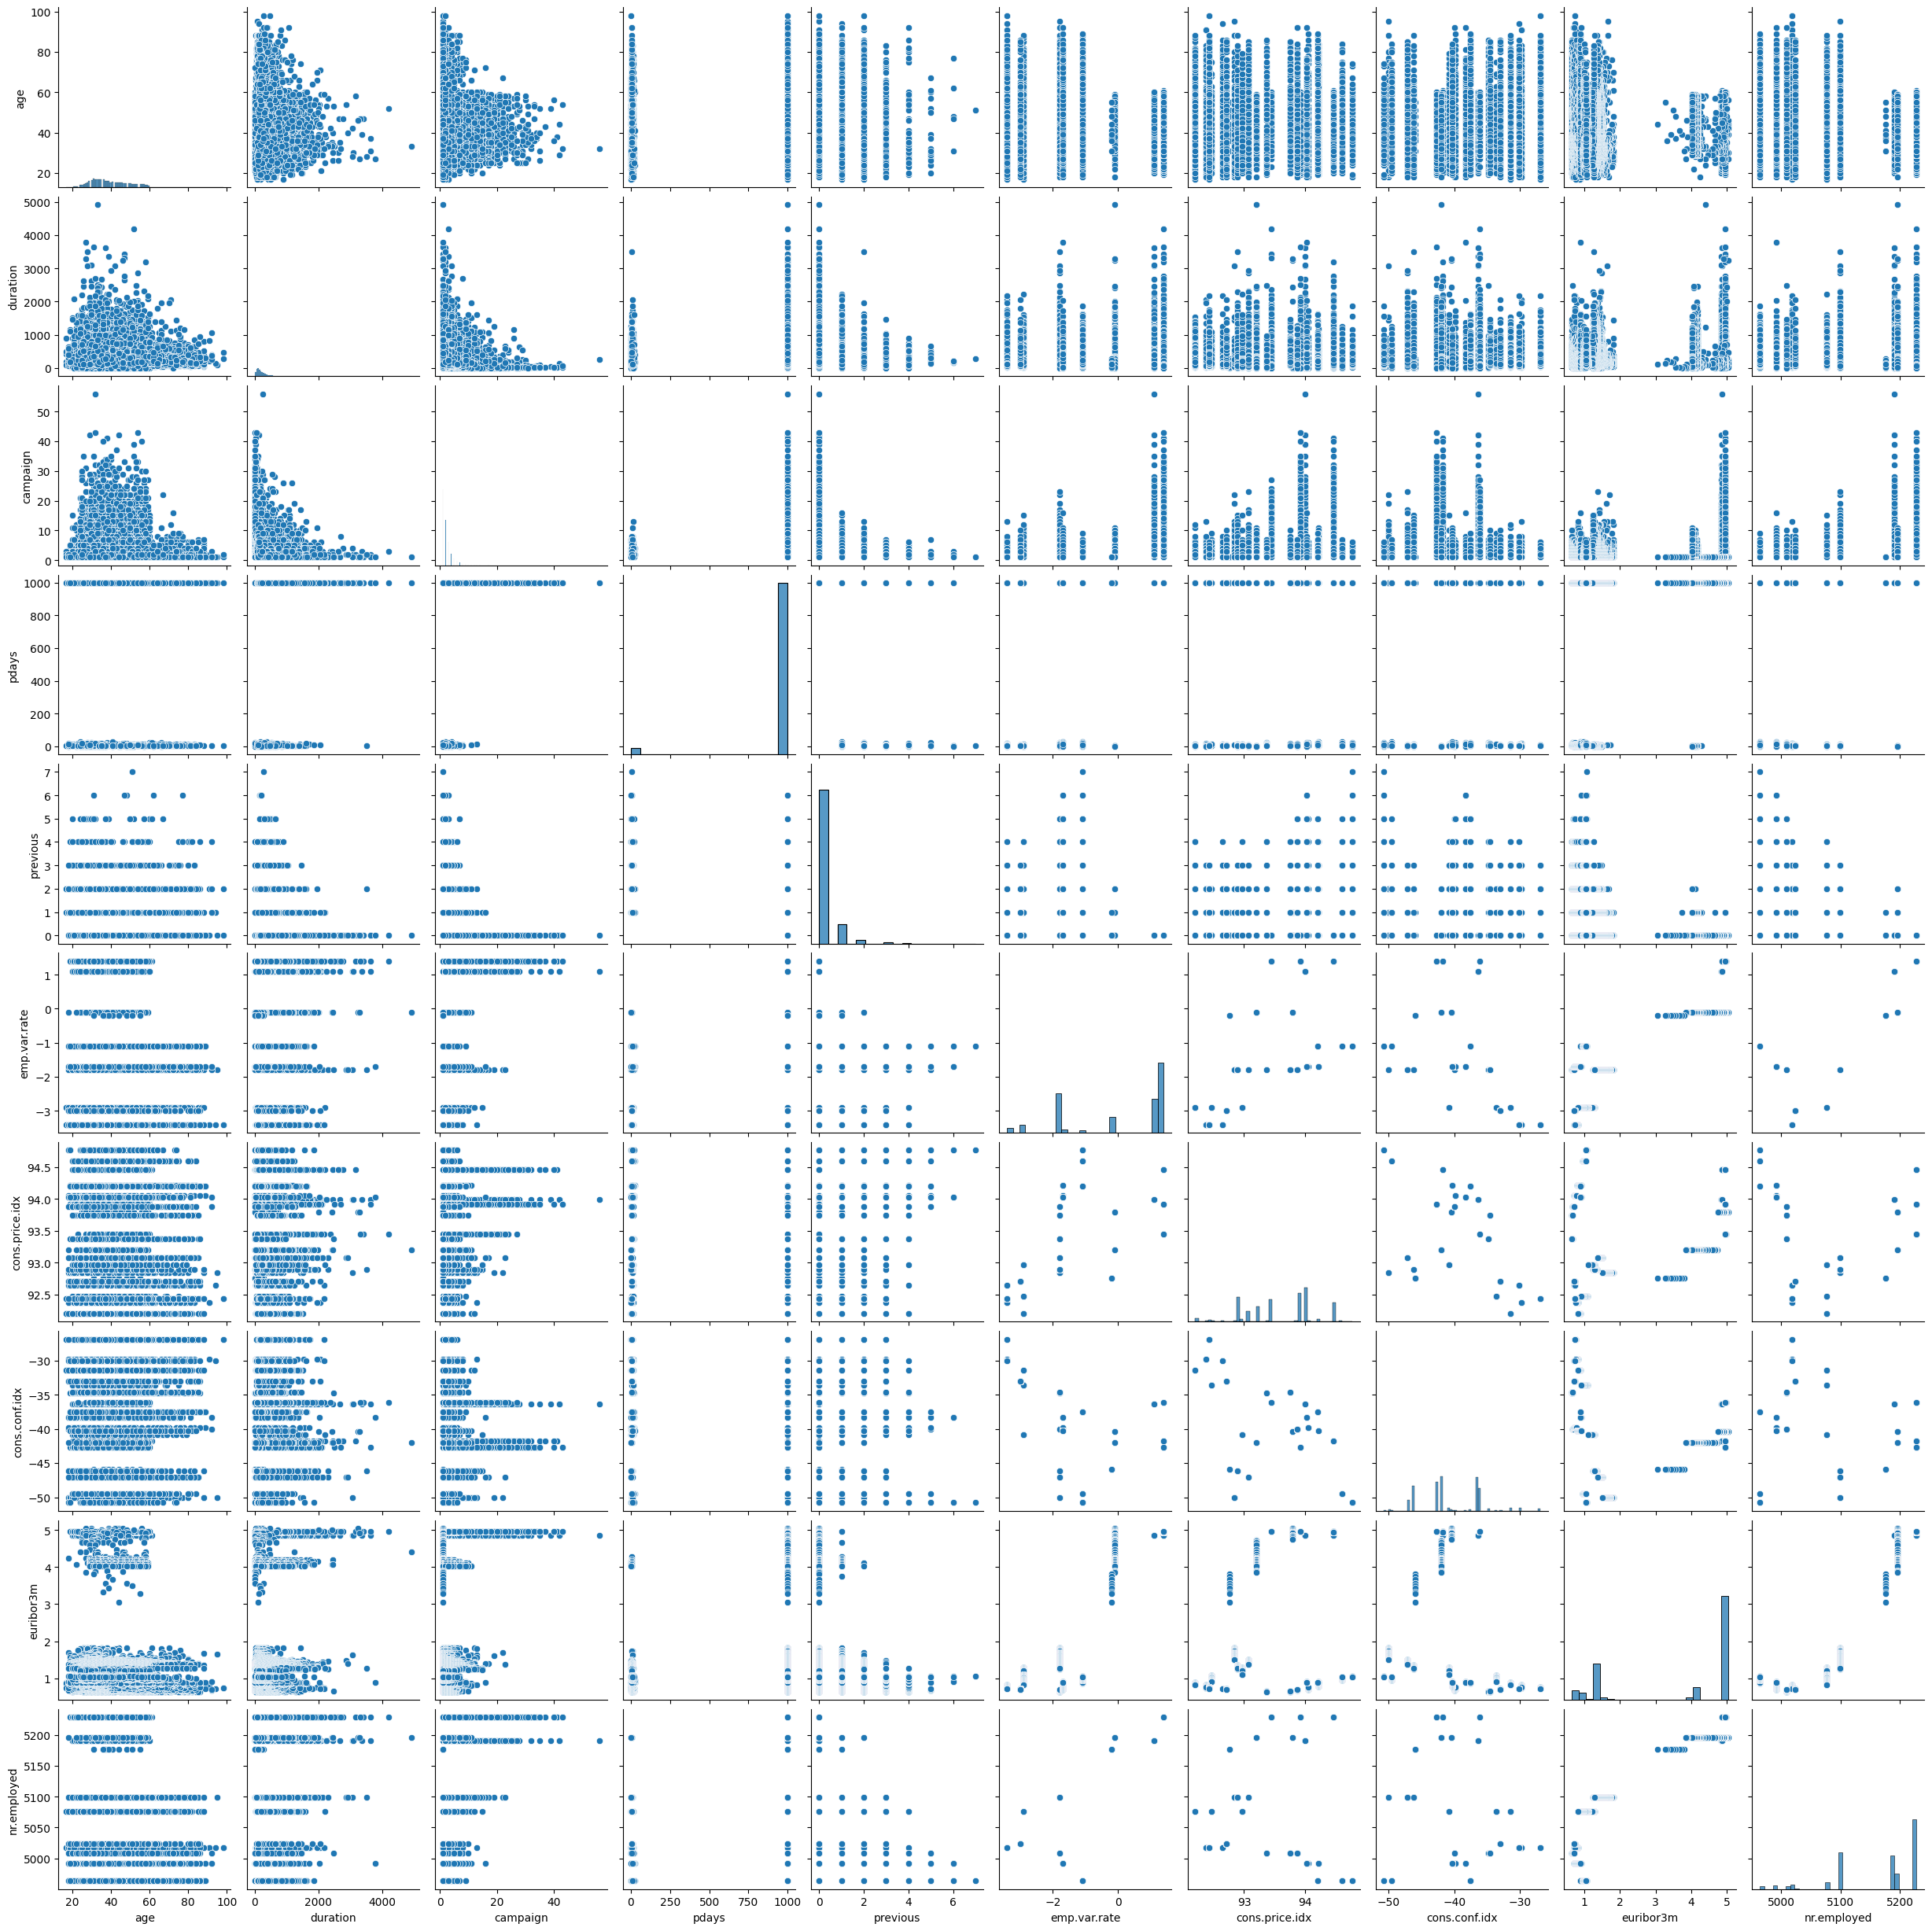

In [67]:
sns.pairplot(
    corr_data
)

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'campaign'}>],
       [<Axes: title={'center': 'pdays'}>,
        <Axes: title={'center': 'previous'}>,
        <Axes: title={'center': 'emp.var.rate'}>],
       [<Axes: title={'center': 'cons.price.idx'}>,
        <Axes: title={'center': 'cons.conf.idx'}>,
        <Axes: title={'center': 'euribor3m'}>],
       [<Axes: title={'center': 'nr.employed'}>, <Axes: >, <Axes: >]],
      dtype=object)

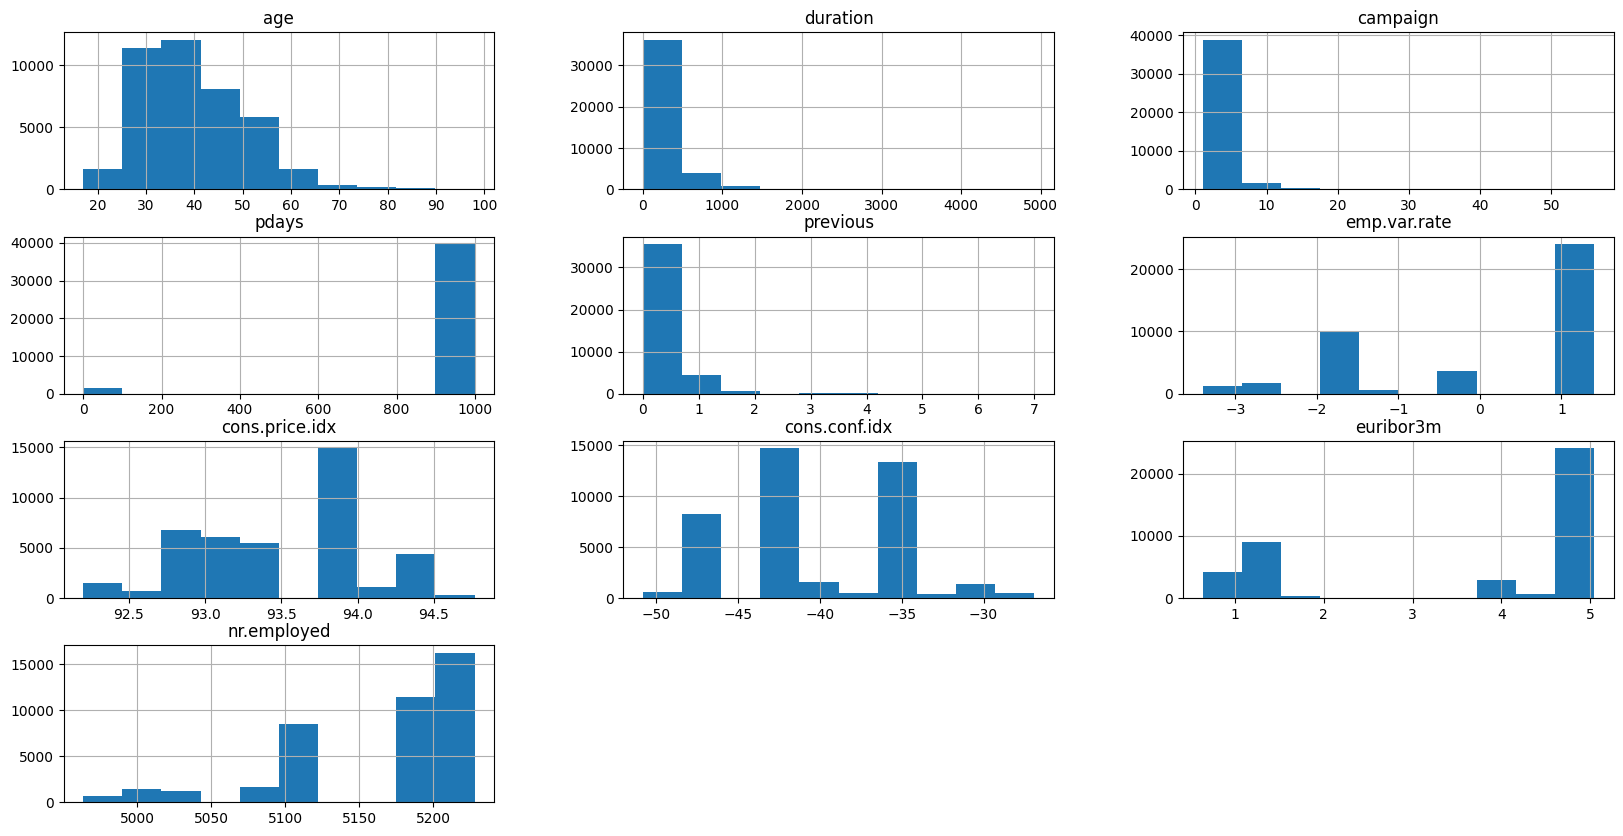

In [68]:
corr_data.hist( figsize=(20, 10))


From the above, we can say that we have a column age, the histogram plot shows how frequently each age occurs in the dataset. The x-axis shows the range of ages, and the y-axis shows the frequency of each age in the dataset.

<Figure size 800x500 with 0 Axes>

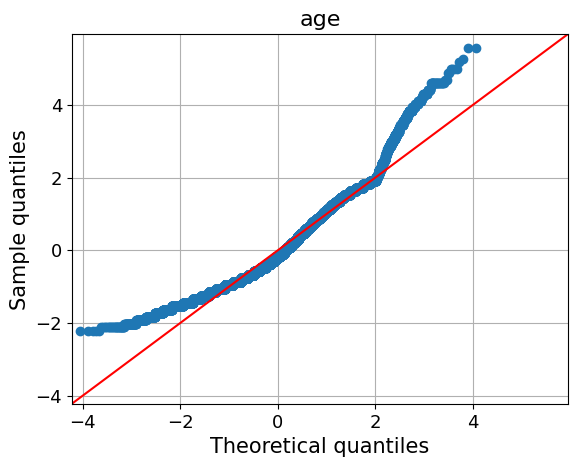

<Figure size 800x500 with 0 Axes>

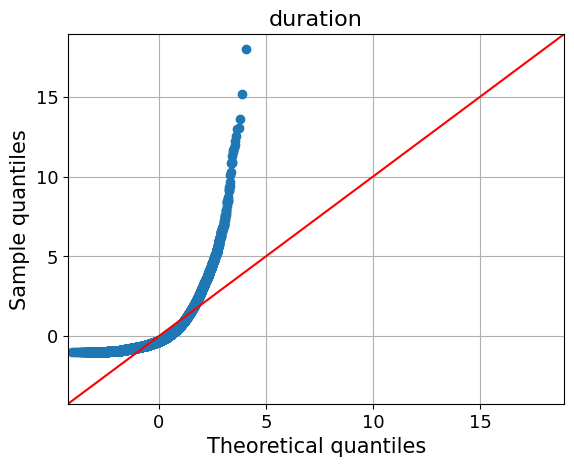

<Figure size 800x500 with 0 Axes>

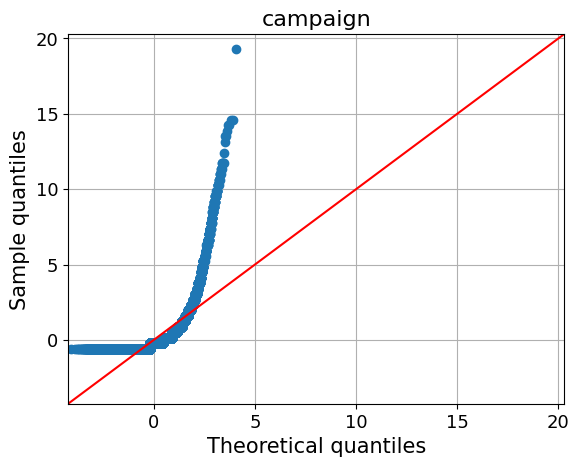

<Figure size 800x500 with 0 Axes>

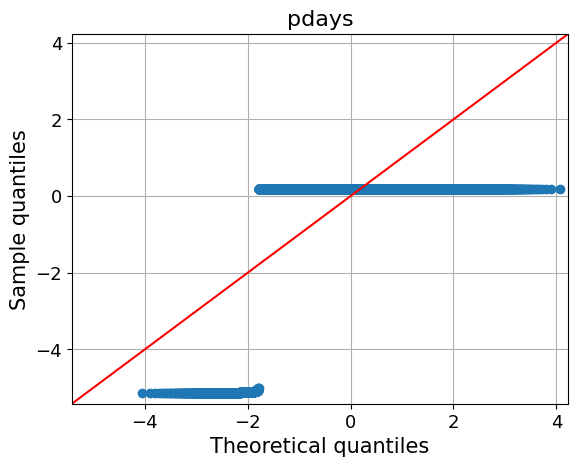

<Figure size 800x500 with 0 Axes>

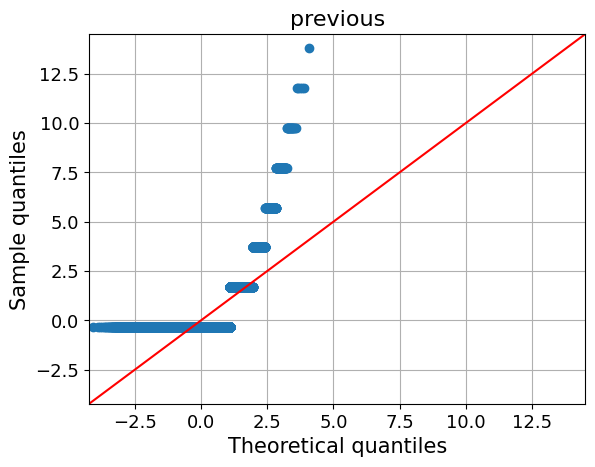

<Figure size 800x500 with 0 Axes>

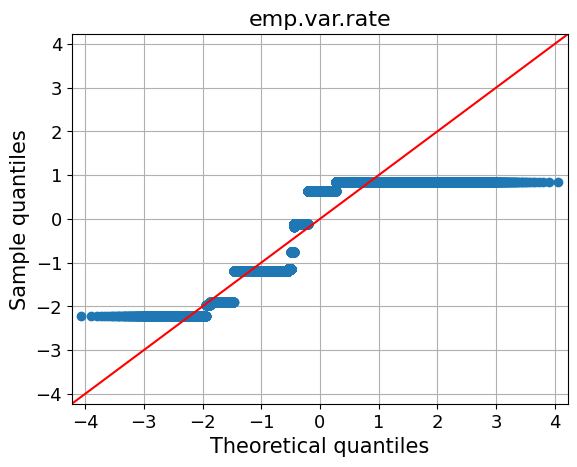

<Figure size 800x500 with 0 Axes>

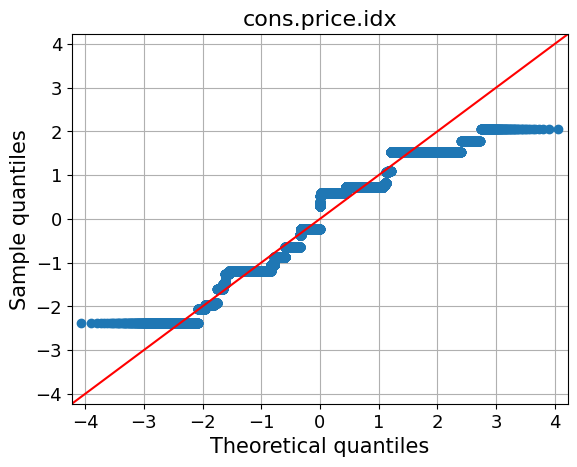

<Figure size 800x500 with 0 Axes>

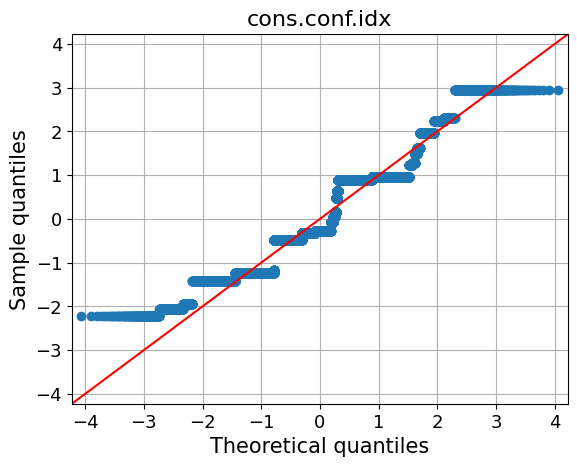

<Figure size 800x500 with 0 Axes>

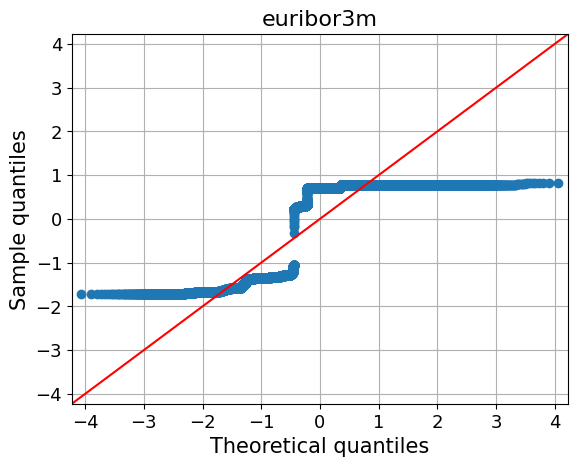

<Figure size 800x500 with 0 Axes>

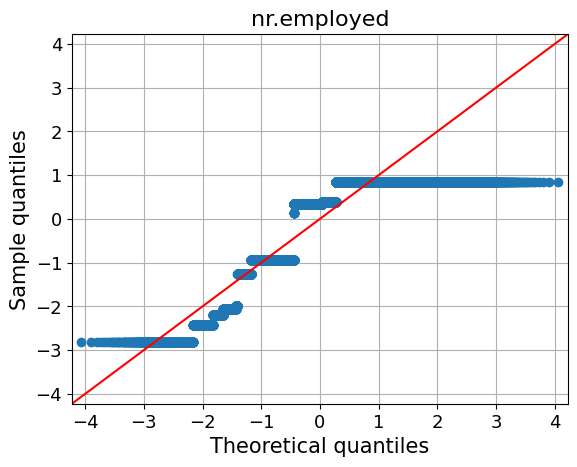

In [69]:
# From above we can observe the likely distributions of all the numeric variable
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot



# Check normality of independent variables
data_norm=corr_data[['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]


for c in data_norm.columns[:]:
  plt.figure(figsize=(8,5))
  fig=qqplot(data_norm[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("{}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()

  #Age has somewhat normal distribution

In [70]:

#Importing H20 automl
#H2O AutoML provides necessary data processing capabilities.
#So there is no need to create duplicates and can take care of missing value imputation and other data cleaning activities.
import h2o
from h2o.automl import H2OAutoML
import os


In [71]:
h2o.init(strict_version_check=False)
#It starts the H2o clusters

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,29 mins 09 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 month and 30 days
H2O_cluster_name:,H2O_from_python_unknownUser_zt9zkc
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [72]:
# Setting up maximum runtime for the AutoML
min_mem_size = 6
#min_mem_size specifies the minimum memory (in gigabytes) that should be allocated to the H2O cluster.


run_time = 222

# run_time specifies the maximum runtime (in seconds) for the AutoML algorithm to search for the best model.
# This parameter helps to limit the time the algorithm spends searching for the best model, as it can be time-consuming and resource-intensive.

In [73]:
from distutils.util import strtobool
import psutil
pct_memory = 0.5
#This line sets the percentage of available memory to use for the H2O cluster to 50% (0.5).
virtual_memory = psutil.virtual_memory()
#The above line gets information about the available system memory using the psutil.virtual_memory() function, and stores it in the virtual_memory variable.
min_mem_size = int(round(int(pct_memory * virtual_memory.available) / 1073741824, 0))

# finally dividing the available memory by the number of gigabytes in a byte (1073741824) and rounding to the nearest integer.
print(min_mem_size)

3


In [74]:
import random, os, sys
import logging


port_no=random.randint(5555,55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)
  h2o.cluster().shutdown()
  sys.exit(2)
# in try: we are intializing H2O cluster
  #in except: If the H2O cluster initialization fails
  # (for example, if the specified port is already in use), the code logs a critical error using the logging.critical() function,
  #  downloads all logs using h2o.download_all_logs() function and then shuts down the H2O cluster using h2o.cluster().shutdown().
  #  Finally, the code exits with a status code of 2 using the sys.exit(2) function.

Checking whether there is an H2O instance running at http://localhost:10278..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpdhj7hkak
  JVM stdout: /tmp/tmpdhj7hkak/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpdhj7hkak/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:10278
Connecting to H2O server at http://127.0.0.1:10278 ... successful.


H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 month and 30 days
H2O_cluster_name:,H2O_from_python_unknownUser_0gunv6
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [75]:
data = h2o.import_file('https://raw.githubusercontent.com/Pramita0410/ML-Data-Cleaning-and-Feature-Selection/8684ce3293ed4cd98af50bbf942a1820ba2a203c/bank-additional-full.csv')


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [76]:
data.head()

age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


In [77]:
missing_values = data.isna().sum()
print(missing_values)


0.0


In [78]:
data.types


{'age': 'int',
 'job': 'enum',
 'marital': 'enum',
 'education': 'enum',
 'default': 'enum',
 'housing': 'enum',
 'loan': 'enum',
 'contact': 'enum',
 'month': 'enum',
 'day_of_week': 'enum',
 'duration': 'int',
 'campaign': 'int',
 'pdays': 'int',
 'previous': 'int',
 'poutcome': 'enum',
 'emp.var.rate': 'real',
 'cons.price.idx': 'real',
 'cons.conf.idx': 'real',
 'euribor3m': 'real',
 'nr.employed': 'real',
 'y': 'enum'}

In [79]:
data.shape


(41188, 21)

In [80]:
data.describe(chunk_summary=True)
# The "chunk_summary=True" parameter tells H2O.ai to display a summary of each chunk of data, as well as a summary of the entire dataset.





Rows:41188
Cols:21

Chunk compression summary: 
chunk_type    chunk_name                 count    count_percentage    size      size_percentage
------------  -------------------------  -------  ------------------  --------  -----------------
C0L           Constant long              17       10.119              1.3 KB    0.178148
C0D           Constant double            11       6.54762             880  B    0.115272
CBS           Binary                     9        5.35714             6.3 KB    0.842666
CXI           Sparse Integers            13       7.7381              9.5 KB    1.27271
C1N           1-Byte Integers (w/o NAs)  78       46.4286             397.5 KB  53.3133
C1S           1-Byte Fractions           15       8.92857             76.6 KB   10.2744
C2            2-Byte Integers            12       7.14286             121.6 KB  16.3118
C2S           2-Byte Fractions           13       7.7381              131.9 KB  17.6917

Frame distribution summary: 
                 size      number_of_rows    number_of_chunks_per_column    number_of_chunks
---------------  --------  ----------------  -----------------------------  ------------------
127.0.0.1:10278  745.5 KB  41188             8                              168
mean             745.5 KB  41188             8                              168
min              745.5 KB  41188             8                              168
max              745.5 KB  41188             8                              168
stddev           0  B      0                 0                              0
total            745.5 KB  41188             8                              168

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
type,int,enum,enum,enum,enum,enum,enum,enum,enum,enum,int,int,int,int,enum,real,real,real,real,real,enum
mins,17.0,,,,,,,,,,0.0,1.0,0.0,0.0,,-3.4,92.201,-50.8,0.634,4963.6,
mean,40.02406040594343,,,,,,,,,,258.2850101971447,2.567592502670679,962.4754540157328,0.17296299893172798,,0.0818855006312521,93.5756643682626,-40.50260027192387,3.6212908128581076,5167.035910944939,
maxs,98.0,,,,,,,,,,4918.0,56.0,999.0,7.0,,1.4,94.767,-26.9,5.045,5228.1,
sigma,10.421249980934054,,,,,,,,,,259.2792488364648,2.77001354290233,186.9109073447419,0.4949010798392899,,1.5709597405170257,0.5788400489540979,4.6281978561745465,1.7344474048512613,72.2515276682598,
zeros,0,,,,,,,,,,4,0,15,35563,,0,0,0,0,0,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,149.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,226.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no




1.   **Frame distribution summary** section provides information about the distribution of the data across the available nodes in the H2O cluster.

2.   **Column type frequency summary** section shows the frequency of each column type in the dataset, which can be helpful for understanding the data types and formats of the columns in the dataset.



In [81]:
# Create a 80/20 train/test split
pct_rows=0.80
data_train, data_test = data.split_frame([pct_rows])

In [82]:
#Display all columns in X
X=data.columns
print(X)

['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']


In [83]:
#Seperate Dependent variable from Independent variable
y_numeric ='y'
X.remove(y_numeric)
print(X)


['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


**TRAINING AUTOML MODELS**

In [84]:
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)  # Setting of AutoML

In [85]:
aml.train(x=X, y=y_numeric, training_frame=data_train)  # Trainig the dataset on different models

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),6/8
# GBM base models (used / total),2/4
# XGBoost base models (used / total),2/2
# GLM base models (used / total),1/1
# DRF base models (used / total),1/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


In [86]:

#Creates the leader Board for all out models, ranking them by their performance(default: mean_per_class_error	)
#We can also observe that as we go below the leaderboard the logloss, rmse and mse are increasing as well.
#Here from the leaderboard we have "GBM_5_AutoML_1_20221107_231030	" as the leader(best performing) model .
lb = aml.leaderboard

In [87]:
lb.head()


model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_1_AutoML_1_20240219_211507,0.948911,0.174145,0.654417,0.151977,0.236574,0.0559674
StackedEnsemble_BestOfFamily_2_AutoML_1_20240219_211507,0.948745,0.174279,0.652191,0.155397,0.236774,0.056062
StackedEnsemble_BestOfFamily_1_AutoML_1_20240219_211507,0.948712,0.174391,0.651976,0.147809,0.236926,0.0561341
GBM_1_AutoML_1_20240219_211507,0.947883,0.175325,0.649315,0.150614,0.237682,0.056493
XGBoost_1_AutoML_1_20240219_211507,0.945535,0.181152,0.636398,0.150016,0.241916,0.0585236
XGBoost_2_AutoML_1_20240219_211507,0.944366,0.187574,0.643836,0.153121,0.239789,0.057499
GBM_2_AutoML_1_20240219_211507,0.942245,0.194056,0.644768,0.151119,0.24219,0.0586559
GBM_4_AutoML_1_20240219_211507,0.938896,0.203163,0.628216,0.15409,0.246766,0.0608937
GBM_3_AutoML_1_20240219_211507,0.937919,0.20218,0.630796,0.156622,0.246254,0.0606408
GLM_1_AutoML_1_20240219_211507,0.935197,0.207754,0.599466,0.199536,0.249884,0.0624422


In [88]:
all_predictions = aml.leader.predict(data_test)


stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [89]:
all_predictions.head(15)


predict,no,yes
no,0.994842,0.00515842
no,0.997504,0.00249601
no,0.996805,0.0031945
no,0.996552,0.00344836
no,0.997323,0.00267724
no,0.996807,0.00319342
no,0.992635,0.00736472
no,0.997511,0.00248918
no,0.997894,0.00210593
no,0.996631,0.00336896


In [90]:
leaderboard = print(
    aml.leaderboard
)


model_id                                                      auc    logloss     aucpr    mean_per_class_error      rmse        mse
StackedEnsemble_AllModels_1_AutoML_1_20240219_211507     0.948911   0.174145  0.654417                0.151977  0.236574  0.0559674
StackedEnsemble_BestOfFamily_2_AutoML_1_20240219_211507  0.948745   0.174279  0.652191                0.155397  0.236774  0.056062
StackedEnsemble_BestOfFamily_1_AutoML_1_20240219_211507  0.948712   0.174391  0.651976                0.147809  0.236926  0.0561341
GBM_1_AutoML_1_20240219_211507                           0.947883   0.175325  0.649315                0.150614  0.237682  0.056493
XGBoost_1_AutoML_1_20240219_211507                       0.945535   0.181152  0.636398                0.150016  0.241916  0.0585236
XGBoost_2_AutoML_1_20240219_211507                       0.944366   0.187574  0.643836                0.153121  0.239789  0.057499
GBM_2_AutoML_1_20240219_211507                           0.942245   0.194056  0

## **Explanation:**
The table provides performance metrics for various models trained by AutoML, which includes:

A Stacked Ensemble model using all available models

A Stacked Ensemble model using the best performing models from each family

A Gradient Boosting Machine (GBM) model with ID 1

Another GBM model with ID 2

A GBM model with ID 4

An XGBoost model with ID 1

Another GBM model with ID 3

An XGBoost model with ID 2

A Generalized Linear Model (GLM) model with ID 1

The performance metrics reported for each model are:

AUC (Area Under the ROC Curve): A measure of how well the model can distinguish between positive and negative samples.

Log Loss: A measure of the model's error, where lower values indicate better performance.

AUCPR (Area Under the Precision-Recall Curve): A measure of the trade-off between precision and recall for different threshold values.

Mean Per-Class Error: The average error rate across all classes.

RMSE (Root Mean Squared Error): A measure of the model's error, where lower values indicate better performance.

MSE (Mean Squared Error): Another measure of the model's error, where lower values indicate better performance.

Based on the table, the Stacked Ensemble model using all available models achieved the highest AUC and AUCPR scores, indicating that it performed the best overall.

 However, the difference in performance between this model and the Stacked Ensemble model using the best performing models from each family was relatively small.

  The GLM model had the lowest AUC and AUCPR scores, indicating that it performed the worst overall.






In [91]:
print(aml.leader)

Model Details
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_1_AutoML_1_20240219_211507


Model Summary for Stacked Ensemble: 
key                                   value
------------------------------------  ----------------
Stacking strategy                     cross_validation
Number of base models (used / total)  6/8
# GBM base models (used / total)      2/4
# XGBoost base models (used / total)  2/2
# GLM base models (used / total)      1/1
# DRF base models (used / total)      1/1
Metalearner algorithm                 GLM
Metalearner fold assignment scheme    Random
Metalearner nfolds                    5
Metalearner fold_column
Custom metalearner hyperparameters    None

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.038298220873959656
RMSE: 0.19569931240032412
LogLoss: 0.12719950876728445
AUC: 0.9796060272056716
AUCPR: 0.858366460907396
Gini: 0.9592120544113432
Null degrees of freedom: 10091
Residual degrees of

In [92]:
best_model = aml.leader
best_model.model_performance(data_test)

ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.05718750292922904
RMSE: 0.2391390869958925
LogLoss: 0.17917396786807419
AUC: 0.9463352021115831
AUCPR: 0.6499261516674014
Gini: 0.8926704042231661
Null degrees of freedom: 8218
Residual degrees of freedom: 8212
Null deviance: 5844.968337146387
Residual deviance: 2945.2616838154036
AIC: 2959.2616838154036

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.28579351550084936
       no    yes    Error    Rate
-----  ----  -----  -------  --------------
no     6693  586    0.0805   (586.0/7279.0)
yes    187   753    0.1989   (187.0/940.0)
Total  6880  1339   0.0941   (773.0/8219.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.285794     0.660816  225
max f2                       0.137609     0.769573  289
max f0point5                 0.488318     0.63807   147
max accuracy                 0.488318     0.9169    147
max precision                0.952536     1         0
max recall                   0.00210088   1         398
max specificity              0.952536     1         0
max absolute_mcc             0.264961     0.621219  233
max min_per_class_accuracy   0.182681     0.880851  269
max mean_per_class_accuracy  0.137609     0.891759  289
max tns                      0.952536     7279      0
max fns                      0.952536     938       0
max fps                      0.00186676   7279      399
max tps                      0.00210088   940       398
max tnr                      0.952536     1         0
max fnr                      0.952536     0.997872  0
max fpr                      0.00186676   1         399
max tpr                      0.00210088   1         398

Gains/Lift Table: Avg response rate: 11.44 %, avg score: 11.58 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100986                   0.859475           7.16345   7.16345            0.819277         0.897517    0.819277                    0.897517            0.0723404       0.0723404                  616.345   616.345            0.0702797
2        0.0200754                   0.787319           6.61103   6.88891            0.756098         0.818232    0.787879                    0.858115            0.0659574       0.138298                   561.103   588.891            0.13349
3        0.0300523                   0.732945           6.71766   6.83206            0.768293         0.759667    0.781377                    0.825432            0.0670213       0.205319                   571.766   583.206            0.197901
4        0.0400292                   0.693281           5.33147   6.45805            0.609756         0.71191     0.738602                    0.797138            0.0531915       0.258511                   433.147   545.805            0.246696
5        0.0500061                   0.652975           5.4381    6.25456            0.621951         0.670273    0.715328                    0.771826            0.0542553       0.312766                   443.81    525.456            0.296692
6        0.100012                    0.485573           5.21213   5.73334            0.596107         0.568355    0.655718                    0.670091            0.260638        0.573404                   421.213   473.334            0.534525
7        0.150018                    0.32863            3.6804    5.04903            0.420925         0.4069      0.577453    

Here, he AUC value of 0.9509 indicates that the model is able to distinguish between the positive and negative classes quite well. The confusion matrix shows that the model has a low error rate for the negative class (no), but a higher error rate for the positive class (yes).
So, the confusion matrix shows the number of true positive, true negative, false positive and false negative predictions made by the model. It also shows the error rate for each prediction made. The table also shows the maximum value of each evaluation metric and its corresponding threshold value.

The Gains/Lift Table is a measure of how much better the model is performing compared to a random model. It shows the response rate and score of the model as well as the cumulative response rate and score at different thresholds. The table also shows the lift and gain values of the model.

In [93]:
# Getting the name of the best model
best_model_name = best_model.model_id

# Print the name of the best model
print("The best model is:", best_model_name)


The best model is: StackedEnsemble_AllModels_1_AutoML_1_20240219_211507


**Explanation**: The top three models on the leaderboard differ in their approach to making predictions. The first two models are ensemble models, which combine multiple models, while the third model is a GBM which is a Gradient Boosting Method.

 Ensembles, particularly stacked ensembles, tend to perform better than single models as they use a combination of models to make predictions.

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

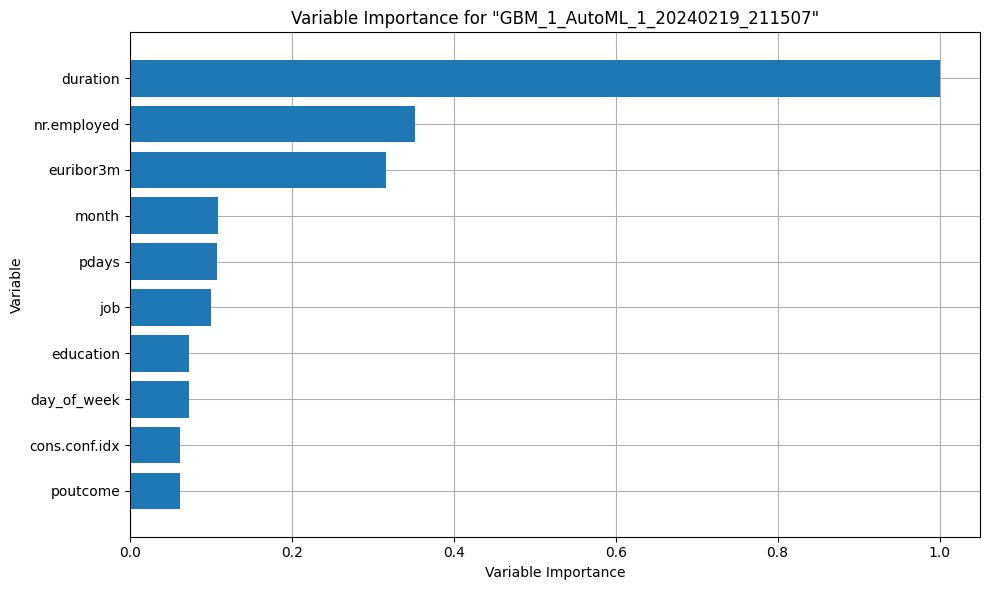

In [94]:
best_mod = aml.explain(frame = data_test, figsize = (10,6),include_explanations=['varimp'])
#referred this line of code to find the variable importance from the notebook provided


The above graph shows the variable importance of the top third best model because the first (i.e., stackedensemble) does not have a variable importance plot.

In [95]:
%matplotlib inline
best_model.varimp()

**As, stacked ensemble models do not have a variable importance plot. I will be tring to visualize the variable importance of the base models that are used to create the stacked ensemble in the next step. We will access the base models of the stacked ensemble using the base_models attribute.**

In [96]:
from h2o.estimators import H2OGradientBoostingEstimator, H2ORandomForestEstimator, H2OStackedEnsembleEstimator

# Define base models with cross-validation
model1 = H2OGradientBoostingEstimator(nfolds=5, seed=123, keep_cross_validation_predictions=True)
model2 = H2ORandomForestEstimator(nfolds=5, seed=123, keep_cross_validation_predictions=True)

# Train base models on training data
model1.train(x=data.col_names[:-1], y=data.col_names[-1], training_frame=data_train)
model2.train(x=data.col_names[:-1], y=data.col_names[-1], training_frame=data_train)

# Train stacked ensemble model
ensemble = H2OStackedEnsembleEstimator(base_models=[model1, model2], seed=123)
ensemble.train(x=data.col_names[:-1], y=data.col_names[-1], training_frame=data_train)

# Evaluate ensemble model performance on test data
ensemble_perf = ensemble.model_performance(data_test)
print(ensemble_perf)


gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
stackedensemble Model Build progress: |██████████████████████████████████████████| (done) 100%
ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.06030805069890263
RMSE: 0.24557697509926013
LogLoss: 0.19954694438671966
AUC: 0.946257523099093
AUCPR: 0.6530299966307462
Gini: 0.8925150461981859
Null degrees of freedom: 8218
Residual degrees of freedom: 8216
Null deviance: 5844.968337146387
Residual deviance: 3280.1526718288974
AIC: 3286.1526718288974

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.20206411266113922
       no    yes    Error    Rate
-----  ----  -----  -------  --------------
no     6761  518    0.0712   (518.0/7279.0)
yes    217   723    0.2309   (217.0/940.0)
Total  6978  1241   0.0894   (735.0/8219.0)

Maximum Metrics: Maximum metrics at their respe

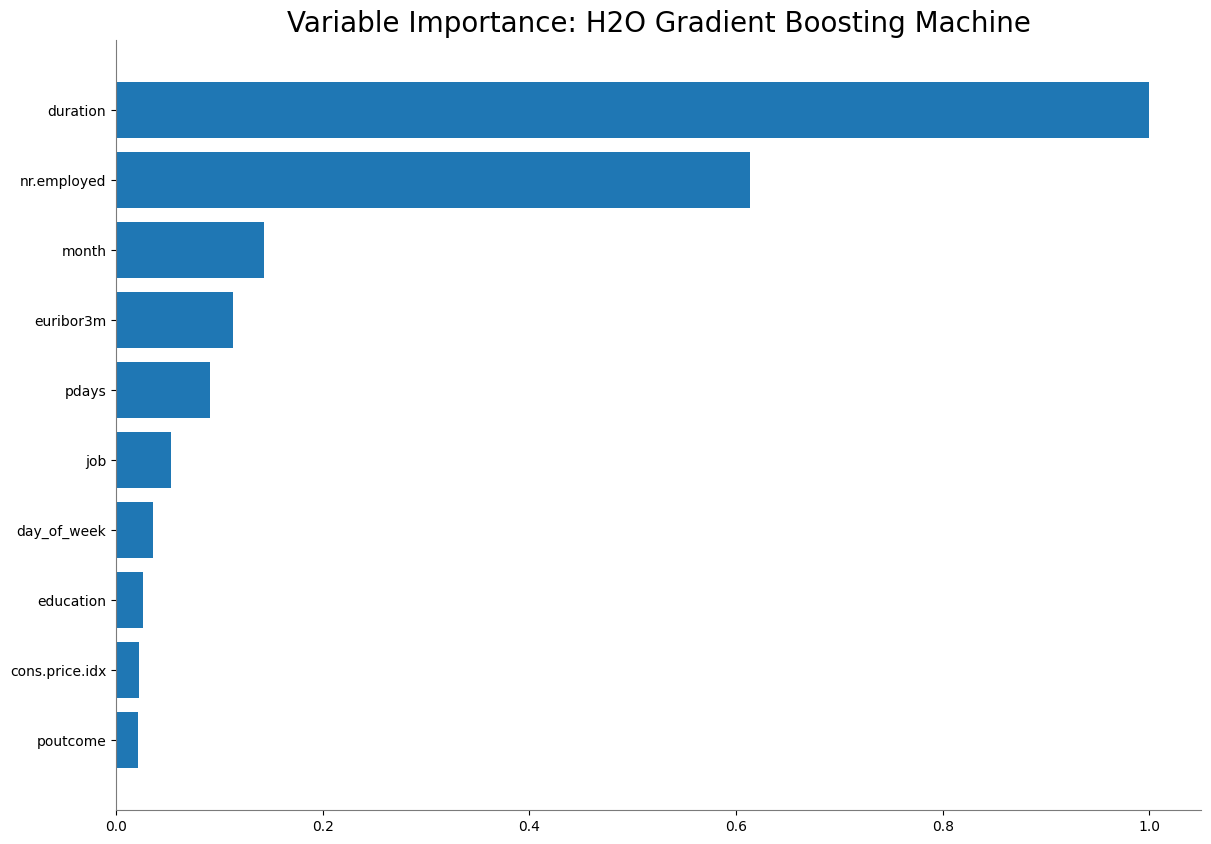

<Figure size 640x480 with 0 Axes>

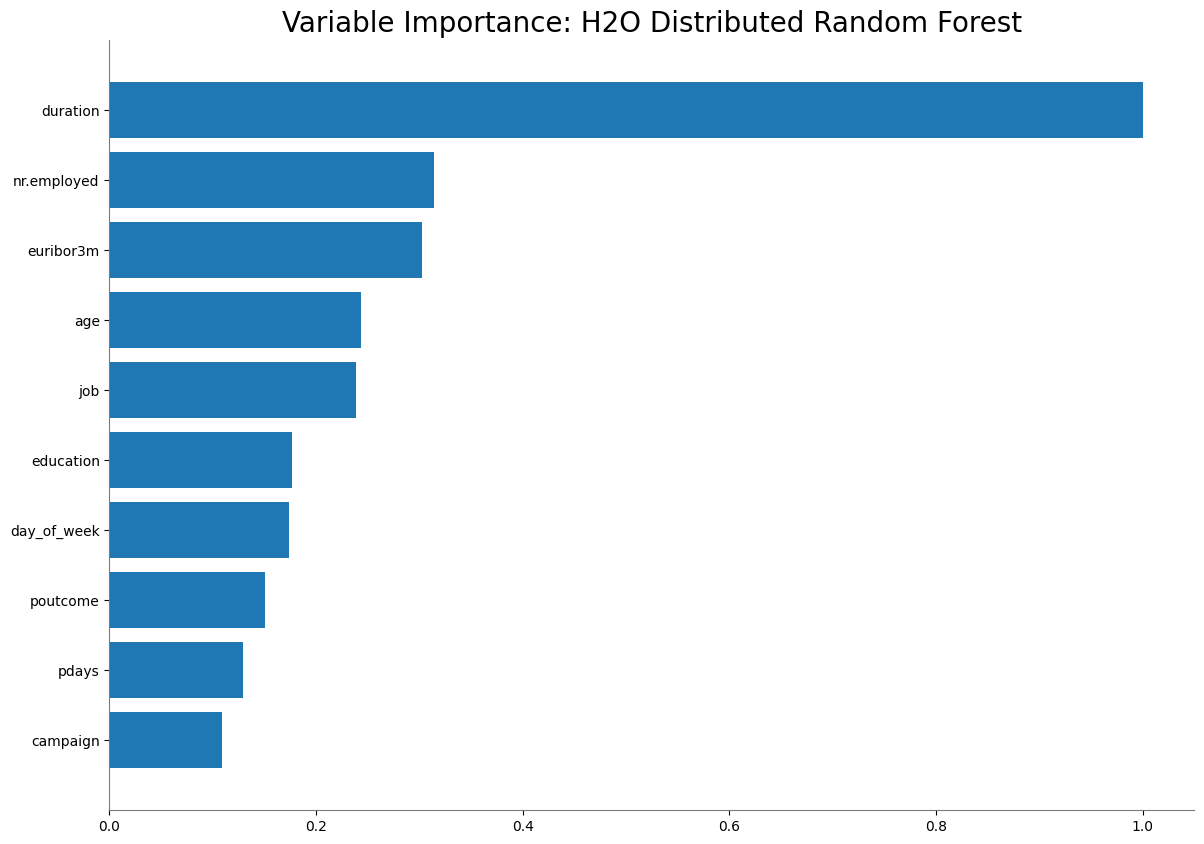

<Figure size 640x480 with 0 Axes>

In [97]:
import matplotlib.pyplot as plt

# Plot variable importances for model1
model1_varimp = model1.varimp()
model1_varimp_plot = model1.varimp_plot()
plt.show(model1_varimp_plot)

# Plot variable importances for model2
model2_varimp = model2.varimp()
model2_varimp_plot = model2.varimp_plot()
plt.show(model2_varimp_plot)


# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_AllModels_1_AutoML_1_20240219_211507,0.946335,0.179174,0.649926,0.139721,0.239139,0.0571875,4895,0.059844,StackedEnsemble
StackedEnsemble_BestOfFamily_2_AutoML_1_20240219_211507,0.94624,0.179117,0.647842,0.142689,0.239435,0.0573292,3582,0.044319,StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_1_20240219_211507,0.946165,0.179175,0.645276,0.144936,0.239527,0.0573731,5183,0.036502,StackedEnsemble
GBM_2_AutoML_1_20240219_211507,0.944819,0.192408,0.64087,0.153137,0.242288,0.0587035,1492,0.009167,GBM
GBM_1_AutoML_1_20240219_211507,0.944798,0.180832,0.641144,0.152057,0.240505,0.0578426,6337,0.029091,GBM
XGBoost_1_AutoML_1_20240219_211507,0.94426,0.184922,0.630417,0.141713,0.244022,0.0595466,10070,0.006912,XGBoost
GBM_3_AutoML_1_20240219_211507,0.943062,0.198492,0.629821,0.161455,0.245437,0.0602392,1168,0.008086,GBM
GBM_4_AutoML_1_20240219_211507,0.942788,0.201374,0.623025,0.135333,0.246768,0.0608943,1303,0.008627,GBM
XGBoost_2_AutoML_1_20240219_211507,0.94197,0.254871,0.632906,0.157172,0.259067,0.0671157,1903,0.002717,XGBoost
GLM_1_AutoML_1_20240219_211507,0.934995,0.213276,0.588987,0.189015,0.255023,0.065037,2648,0.004175,GLM


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_AllModels_1_AutoML_1_20240219_211507

,no,yes,Error,Rate
no,6693.0,586.0,0.0805,(586.0/7279.0)
yes,187.0,753.0,0.1989,(187.0/940.0)
Total,6880.0,1339.0,0.0941,(773.0/8219.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

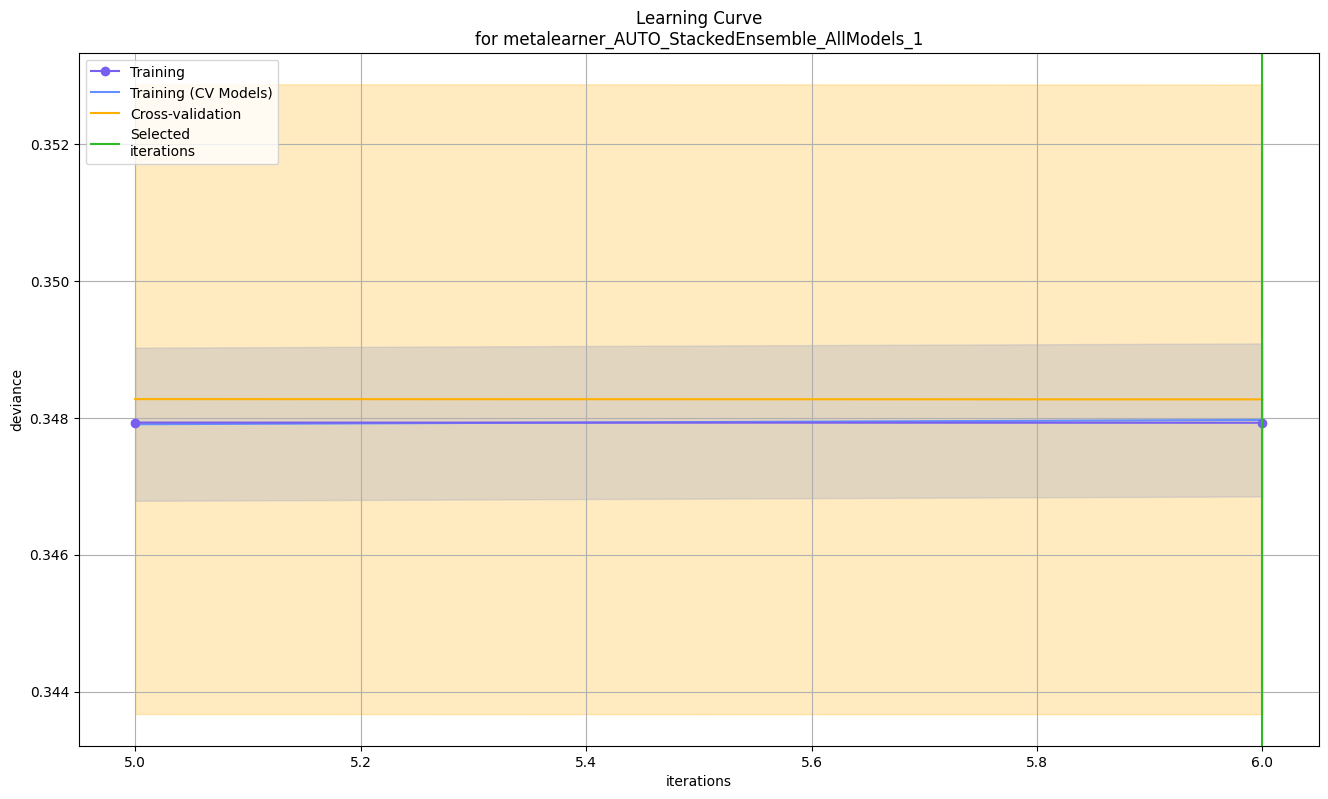

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

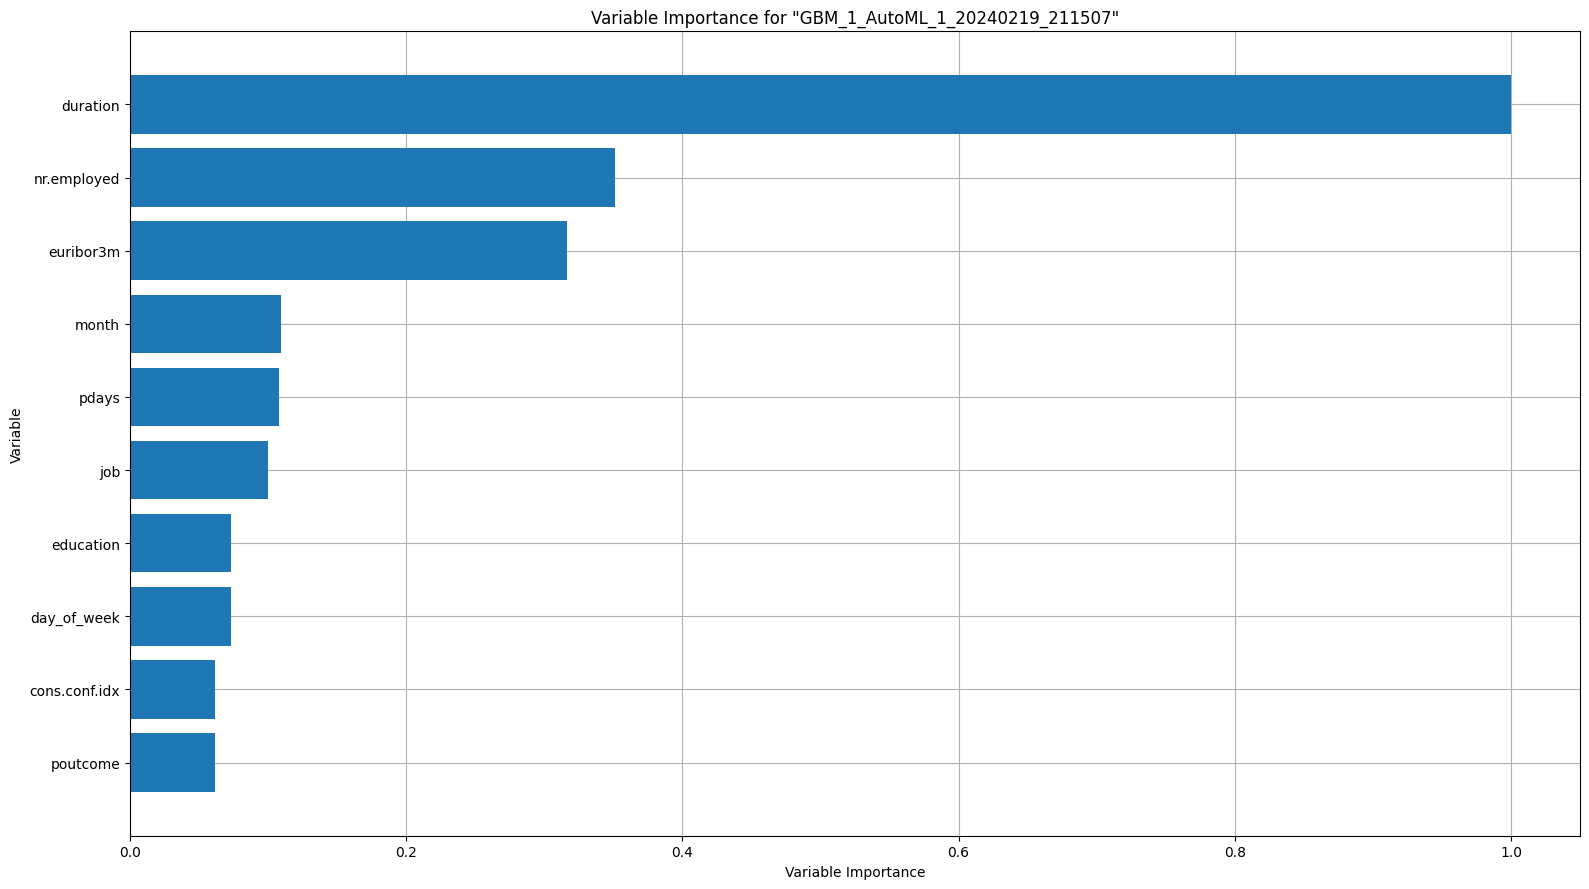

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

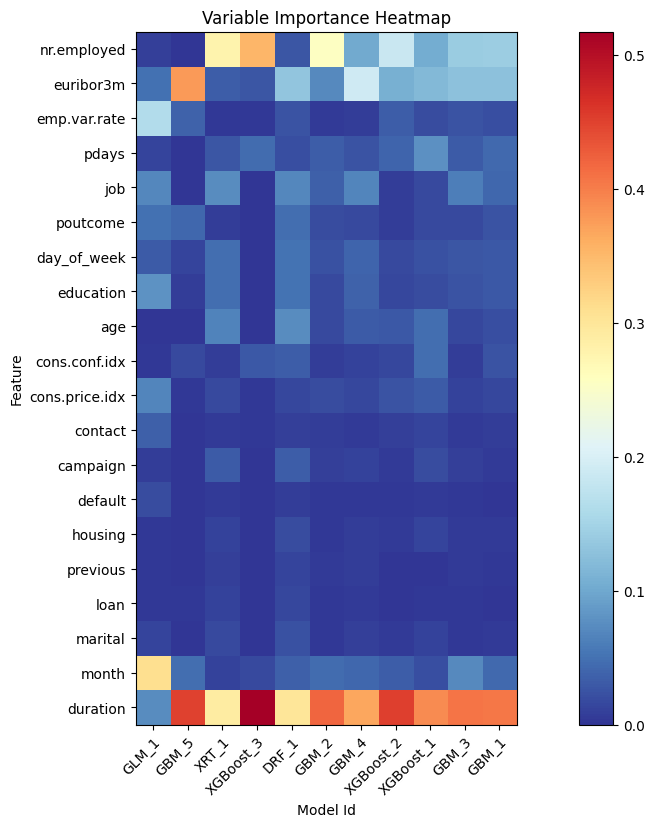

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

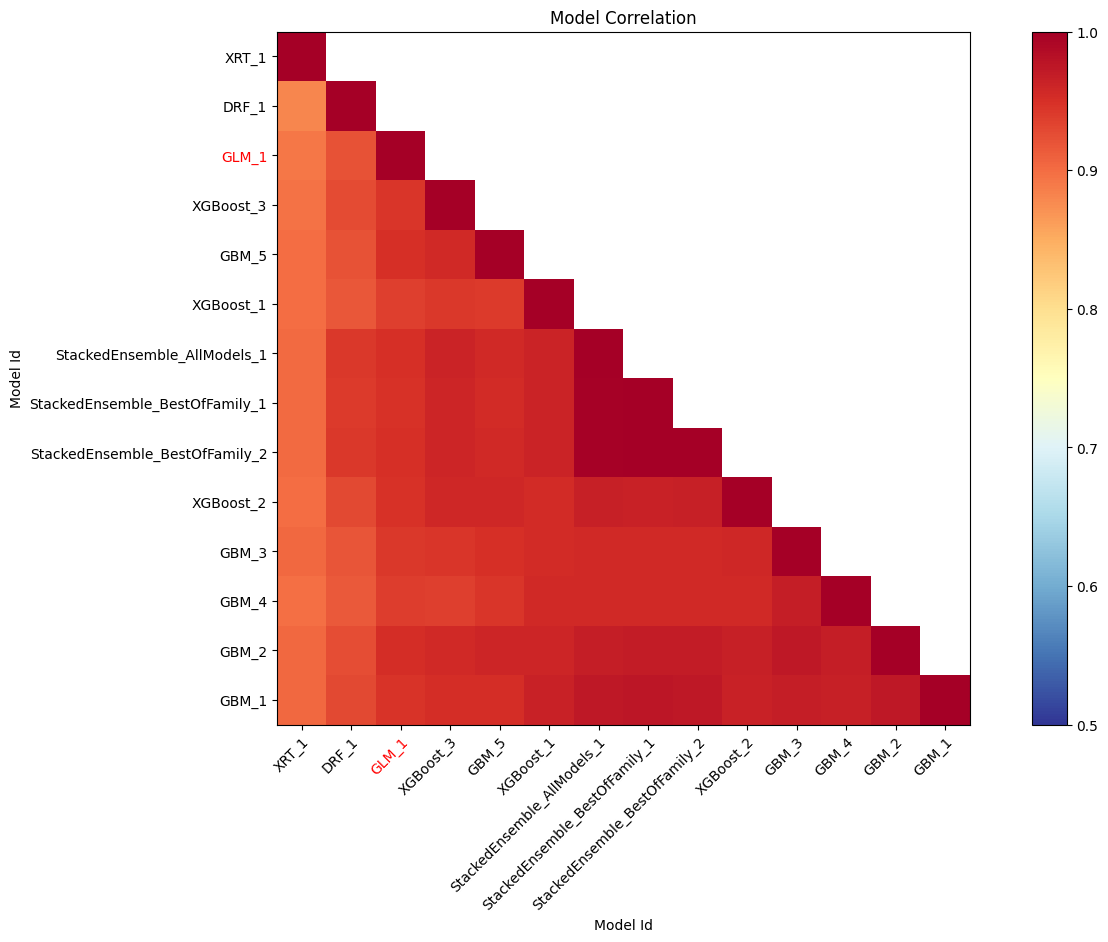

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

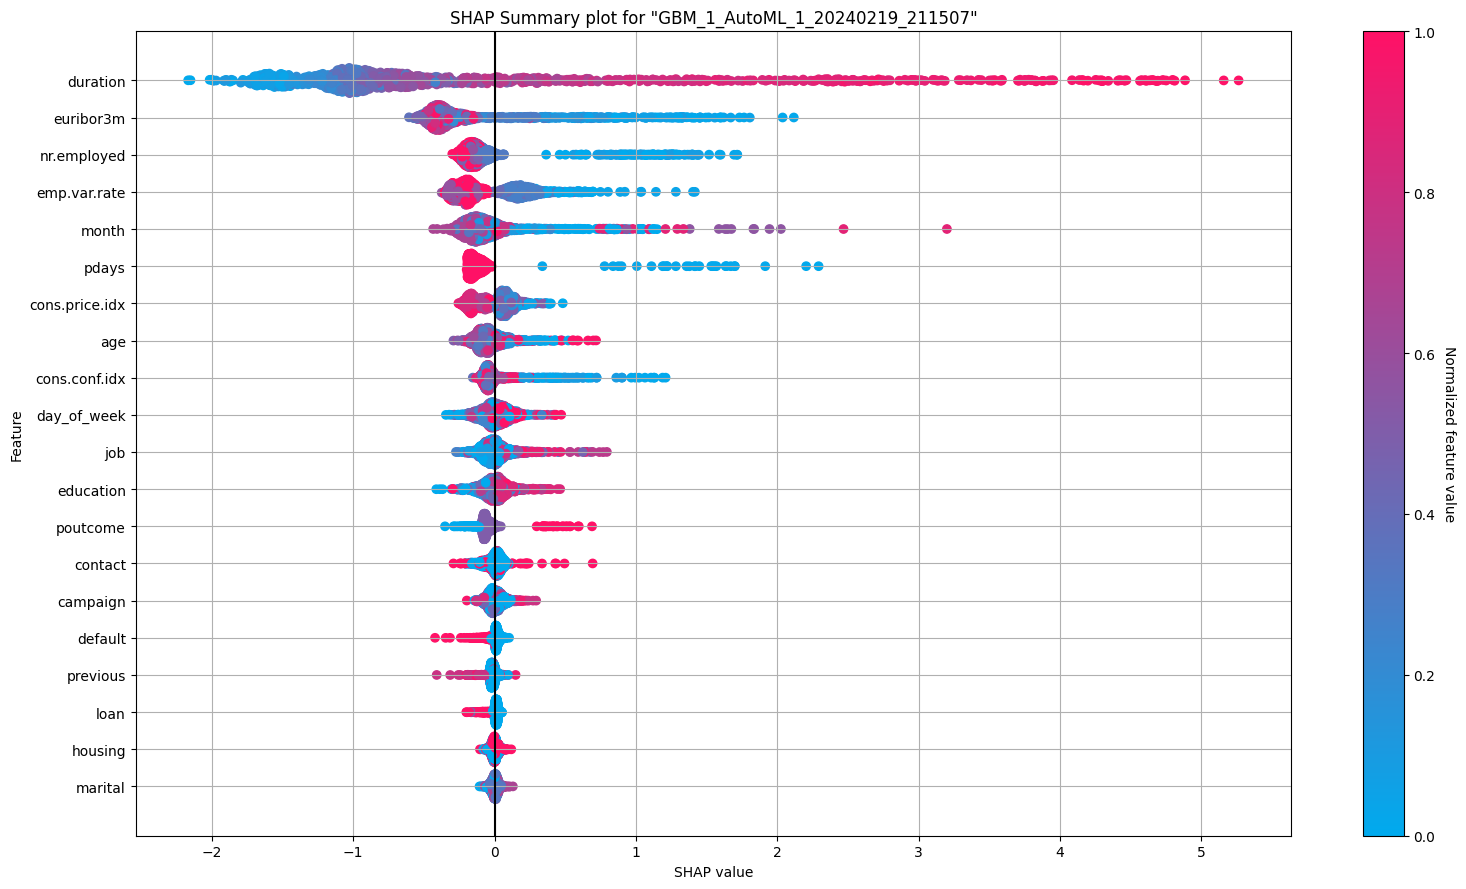

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

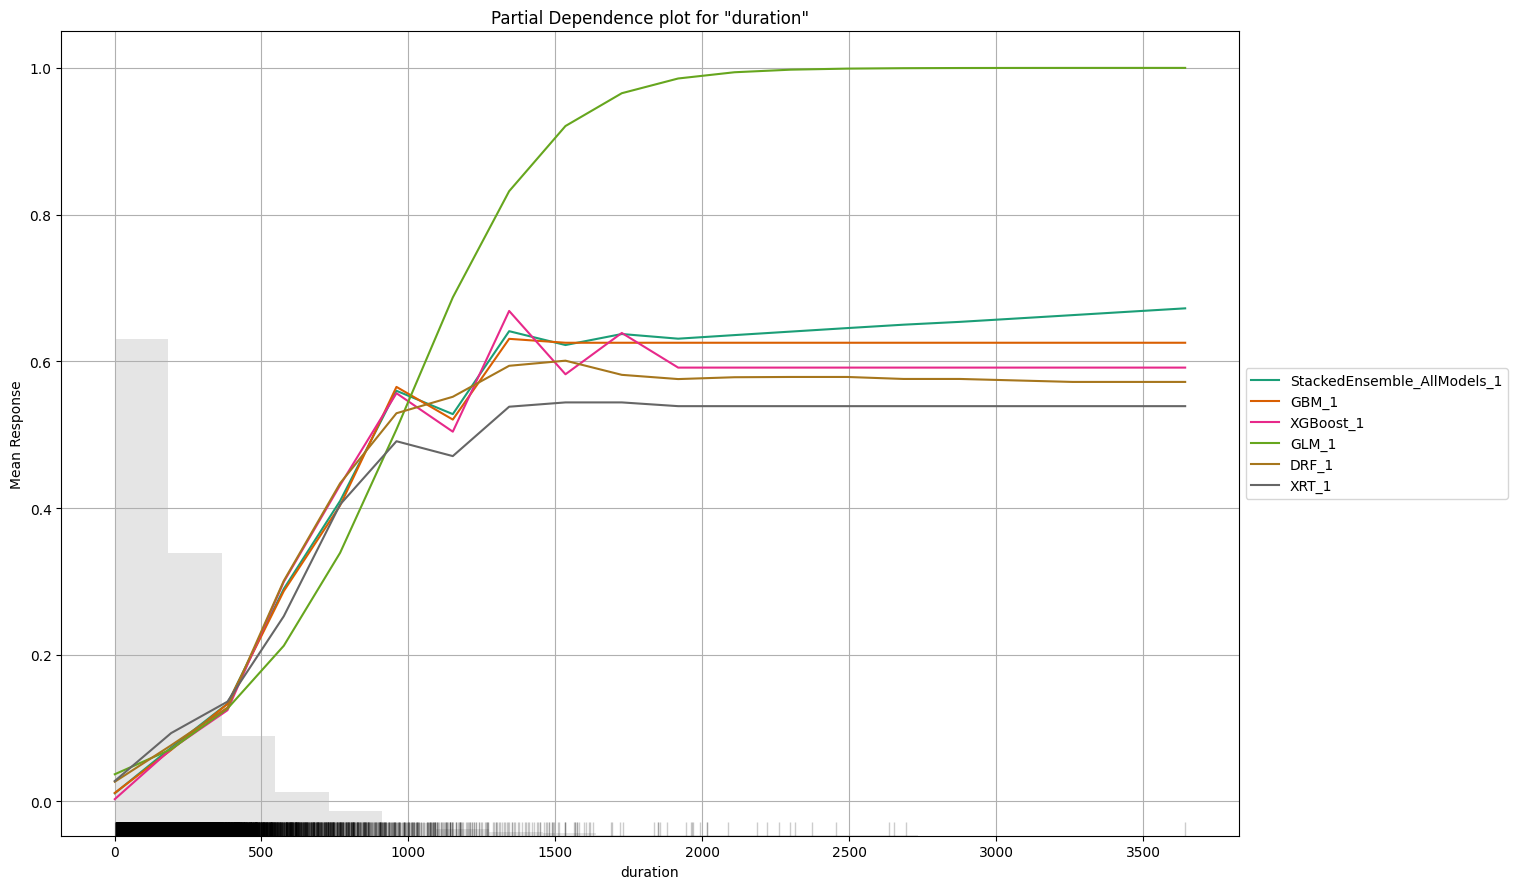

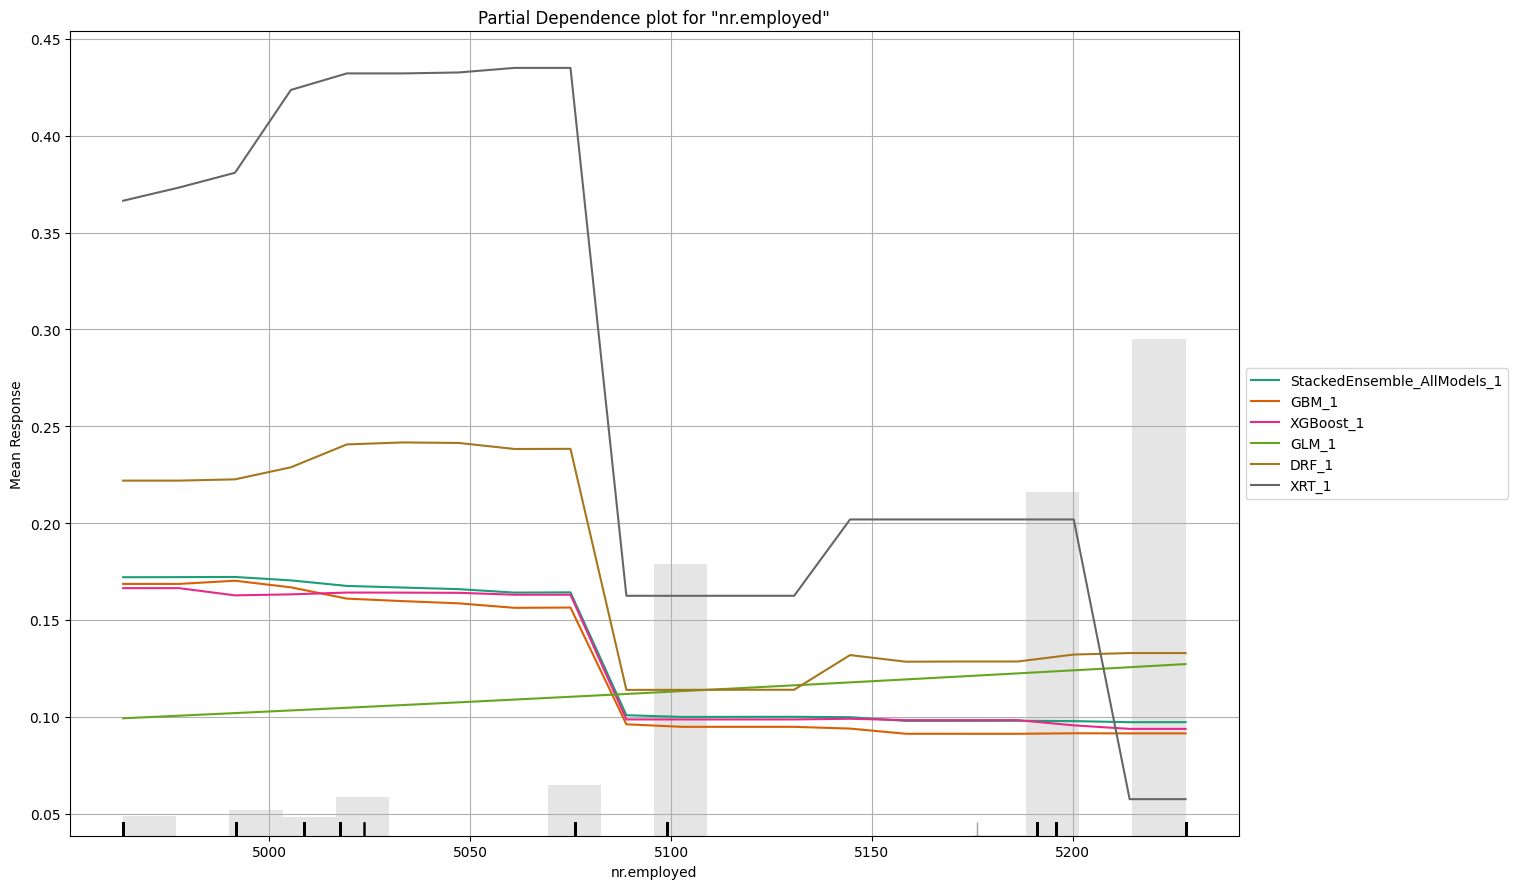

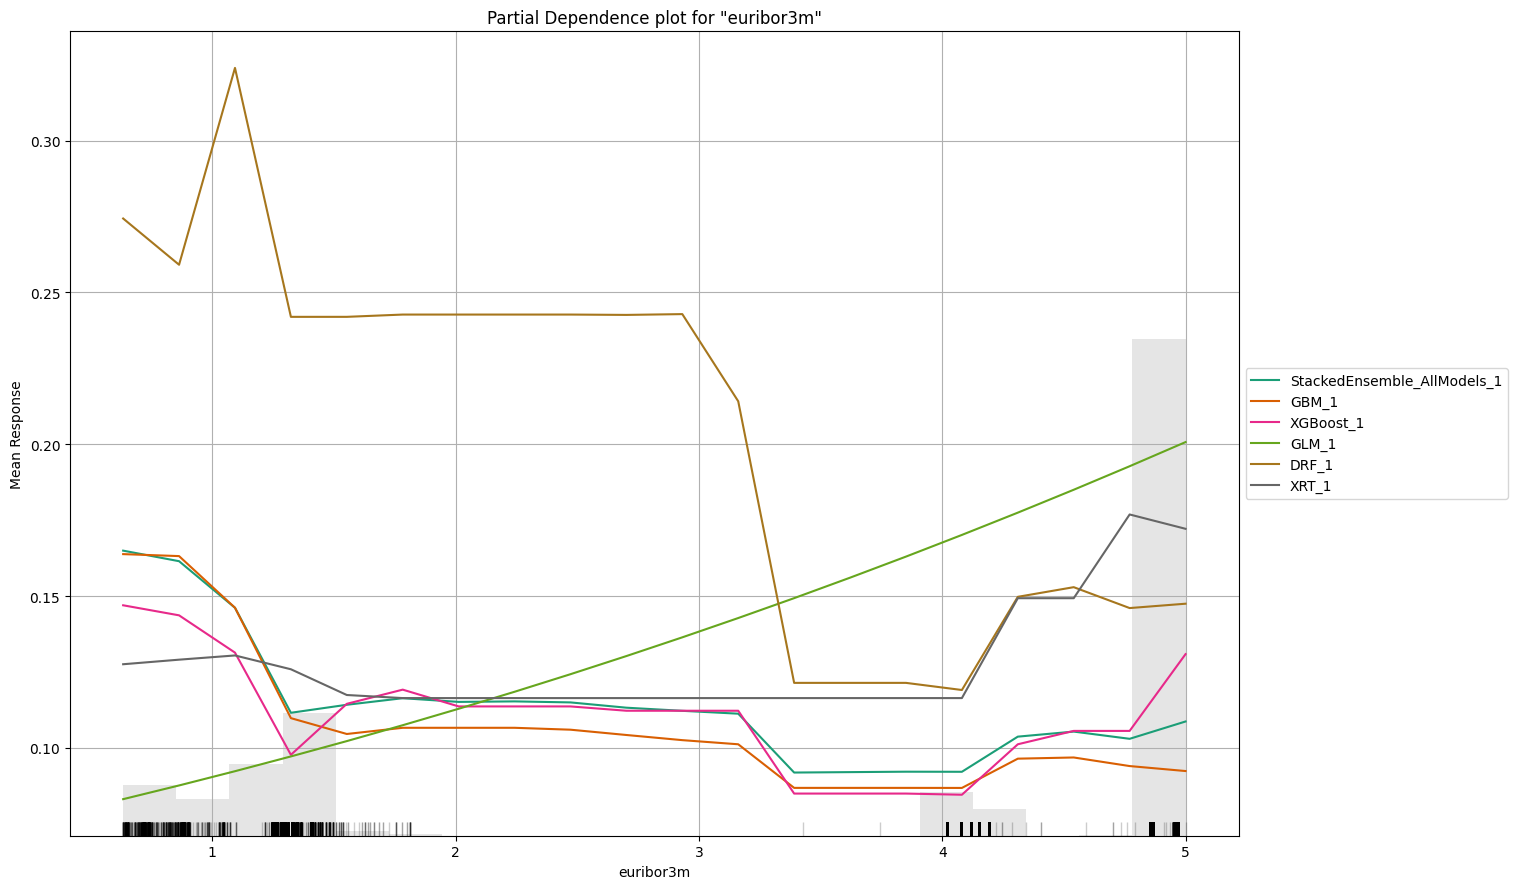

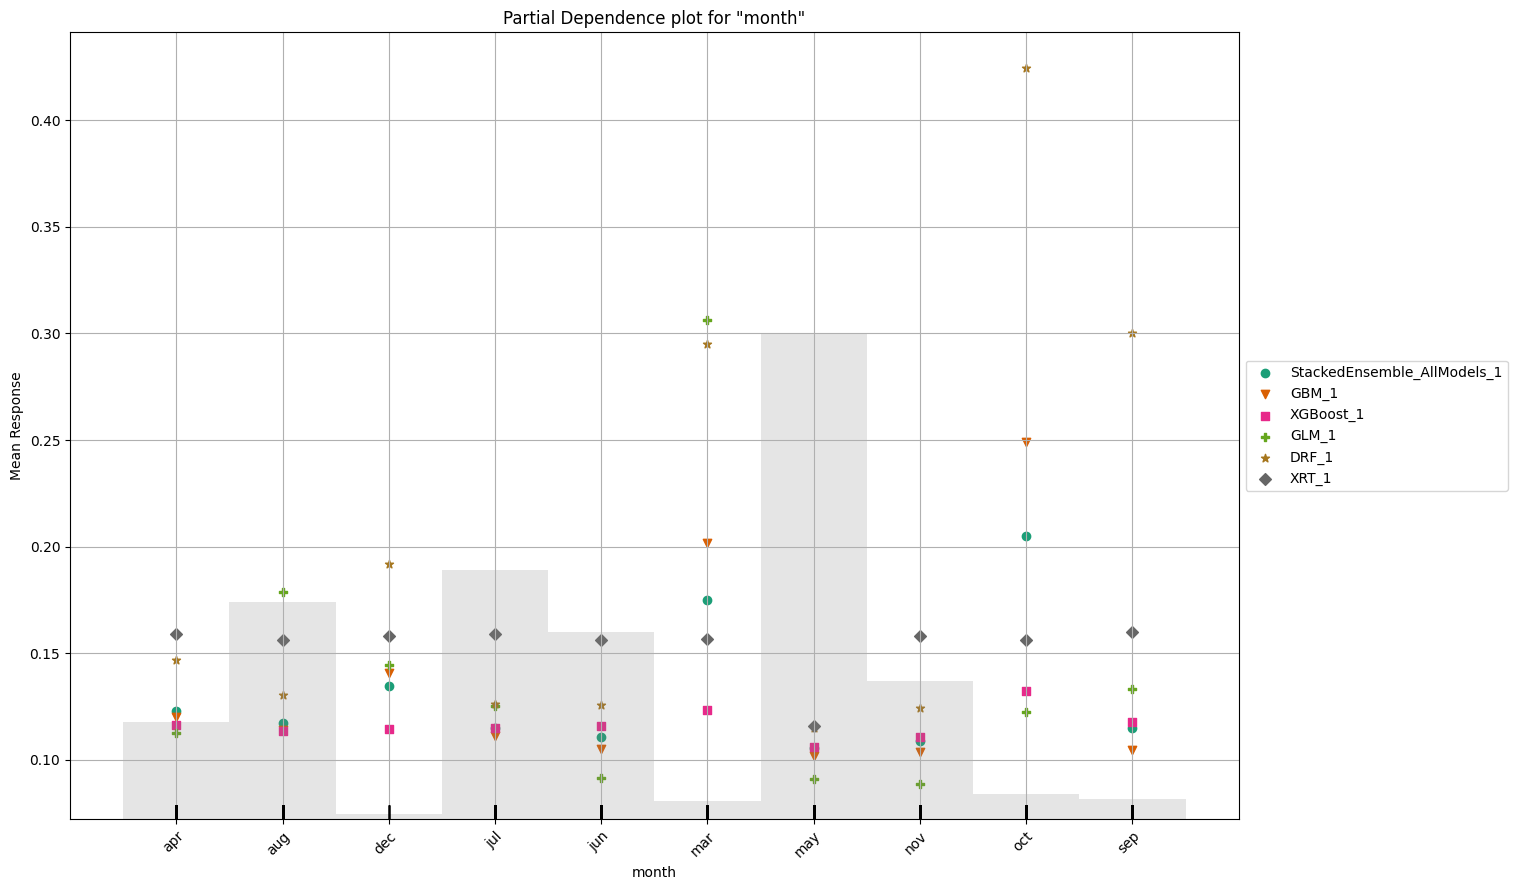

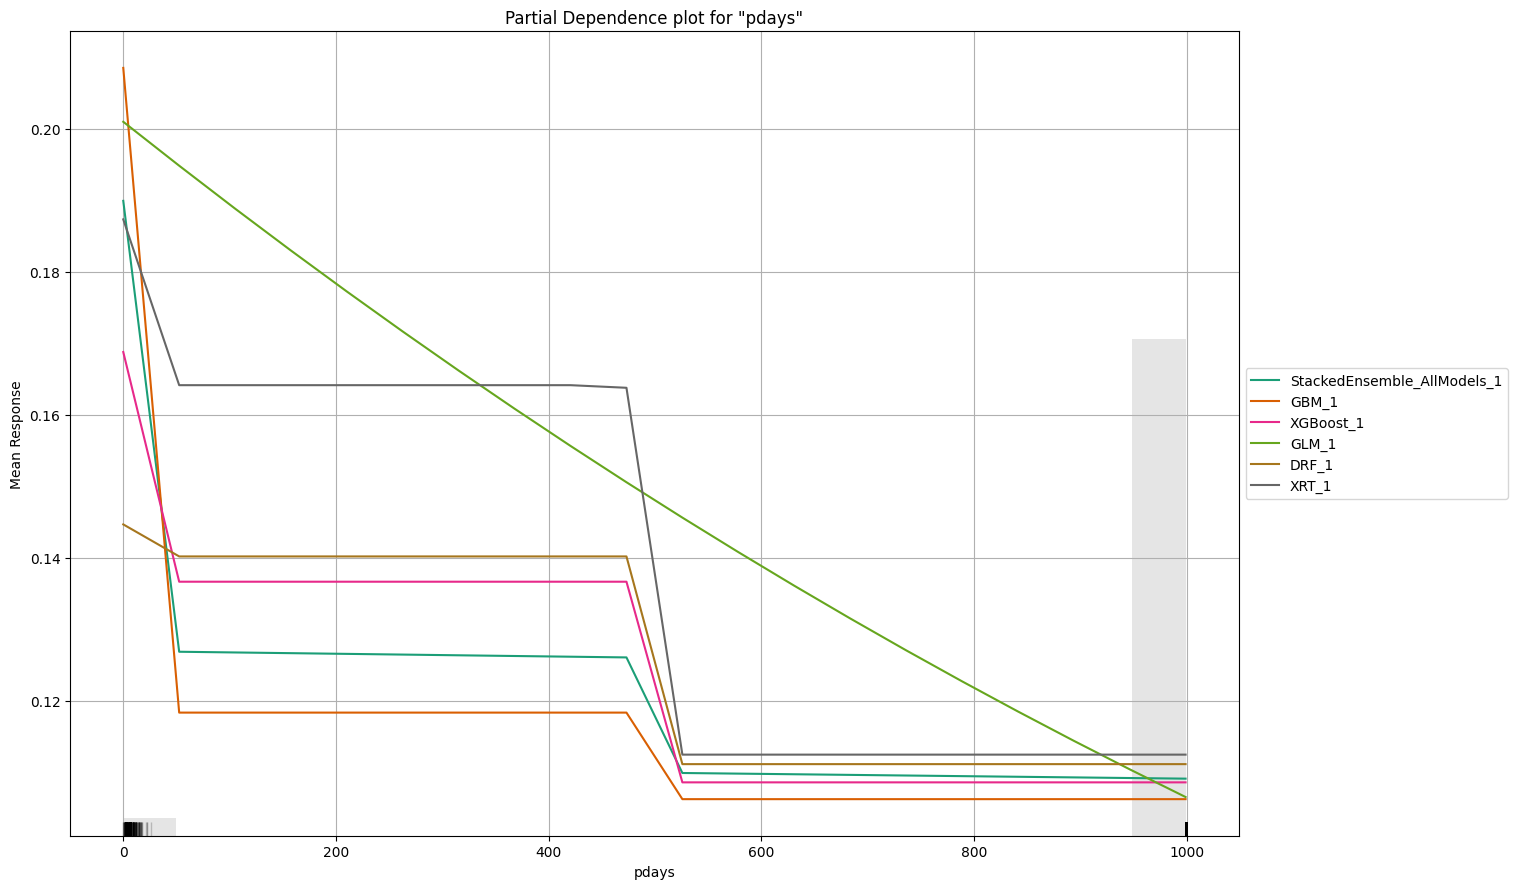

In [98]:
explain = aml.explain(data_test)

In [99]:
corr_data_encoded = pd.get_dummies(corr_data, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y'])
#In this, I have created dummies which is required later.

**Now, lets understand the performance of our best model.**

In [100]:

# Define the target variable
target = 'y'

# Specify the predictor variables
predictors = data.col_names[:-1]

# Run the AutoML process
aml = H2OAutoML(max_models=5, seed=123, max_runtime_secs=3600, sort_metric='AUC')

# Train and validate the models on the training set
aml.train(y=target, x=predictors, training_frame=data_train)

# Evaluate the models on the testing set
performance = aml.leader.model_performance(test_data=data_test)

# Print the performance of the best model
print(performance)


AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.057000378744492576
RMSE: 0.2387475209180036
LogLoss: 0.17807515969723342
AUC: 0.9466888133452982
AUCPR: 0.6464868611349195
Gini: 0.8933776266905964
Null degrees of freedom: 8218
Residual degrees of freedom: 8213
Null deviance: 5844.968337146387
Residual deviance: 2927.199475103123
AIC: 2939.199475103123

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2871910312755535
       no    yes    Error    Rate
-----  ----  -----  -------  --------------
no     6693  586    0.0805   (586.0/7279.0)
yes    186   754    0.1979   (186.0/940.0)
Total  6879  1340   0.0939   (772.0/8219.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.287191     0.661404  227
max f

1. AUC score of 0.9475, which means it was really good at telling the difference between positive and negative things.

2. The model correctly guessed that 6616 out of 6779 negative cases were negative and 763 out of 926 positive cases were positive, which means it had an accuracy of 91.5%

3. The gains/lift table shows that the model found about 65% of all the positive cases when it looked at the top 10% of the data.

4. Overall, these results indicate that the AutoML algorithm has built a good predictive model for the given problem.



 **Is there any multicollinearity in the model?**

**Now, we will check the Multicollinearity of the model**

In [101]:


from statsmodels.stats.outliers_influence import variance_inflation_factor

X1 = corr_data[['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["y"] = X1.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X1.values, i)
                          for i in range(len(X1.columns))]

print(vif_data)

                y           VIF
0             age     16.047296
1        duration      2.011044
2        campaign      1.921499
3           pdays     44.413175
4        previous      2.001464
5    emp.var.rate     28.910219
6  cons.price.idx  22561.123124
7   cons.conf.idx    120.086975
8       euribor3m    226.237349
9     nr.employed  26746.634212


### Explaining the above code

variance_inflation_factor function from the statsmodels package to calculate the variance inflation factor (VIF) for a set of predictor variables in a linear regression model.

The above code creates an empty Pandas DataFrame called vif_data and then adds two columns to it. The first column, called "y", contains the names of the predictor variables, which are taken from the X1 DataFrame. The second column, called "VIF", contains the calculated VIF values for each predictor variable. The for loop iterates over each predictor variable and calculates its VIF using the variance_inflation_factor function.

Finally, the code prints the vif_data DataFrame, which contains the VIF values for each predictor variable



### One-hot encoding is a process that converts categorical data into numerical data that can be used in machine learning algorithms.

In [102]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming `corr_data` is your DataFrame and `categorical_cols` contains the categorical column names
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']
encoder = OneHotEncoder()
encoded_cols = encoder.fit_transform(corr_data[categorical_cols]).toarray()
encoded_cols_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(categorical_cols))

# Concatenate the encoded columns with the numerical columns
data2= pd.concat([corr_data.drop(columns=categorical_cols), encoded_cols_df], axis=1)


# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = data2.columns
vif_data['VIF'] = [variance_inflation_factor(data2.values, i) for i in range(data2.shape[1])]

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)



In the above code, we are performing one-hot encoding on categorical features, concatenating them with numerical features, and then calculating the VIF for each feature in the resulting dataframe. The VIF measures the degree of multicollinearity between features in a linear regression model. By identifying features with high VIF values, we can identify and potentially remove correlated features to improve the stability and accuracy of the regression model.

In [103]:

# Remove columns with infinite VIF
vif_data = vif_data.replace([np.inf, -np.inf], np.nan).dropna()

# Print the updated VIF dataframe
print(vif_data)

          Feature         VIF
0             age    1.689922
1        duration    1.244686
2        campaign    1.048521
3           pdays   12.452899
4        previous    5.945827
5    emp.var.rate  239.754653
6  cons.price.idx   89.918824
7   cons.conf.idx    6.822856
8       euribor3m  198.892609
9     nr.employed  200.062029


Here we are getting **pdays as 12.452899,  emp.var.rate  239.754653, cons.price.idx as  89.918824,
  cons.conf.idx  as  6.822856,
euribor3m as 198.892609, nr.employed as  200.060228 which is very high.**
Hence, we can say that, there is not much multicollinearity in the model except age, duration, campaign as it has low VIF value.





**Is the relationship significant?**

**Lets check the variable significance**

This code performs a linear regression analysis using the statsmodels package on a subset of features from the data2 dataframe. The model is fitted using the sm.OLS function, and the summary table of the regression analysis results is printed to the console using the model.summary() function. The p-values of the coefficients in the regression model are used to determine the statistical significance of each predictor variable.

In [104]:
#Using OLS for p value
import statsmodels.api as sm

model = sm.OLS(data2['y_yes'], data2[['emp.var.rate','euribor3m','nr.employed','poutcome_nonexistent','poutcome_success']]).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  y_yes   R-squared (uncentered):                   0.249
Model:                            OLS   Adj. R-squared (uncentered):              0.249
Method:                 Least Squares   F-statistic:                              2735.
Date:                Mon, 19 Feb 2024   Prob (F-statistic):                        0.00
Time:                        21:28:41   Log-Likelihood:                         -7573.6
No. Observations:               41188   AIC:                                  1.516e+04
Df Residuals:                   41183   BIC:                                  1.520e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
emp.var.rate            -0.0170      0.004     -4.317      0.000      -0.025      -0.009
euribor3m               -0.0337      0.004     -9.141      0.000      -0.041      -0.027
nr.employed           3.289e-05   2.63e-06     12.500      0.000    2.77e-05     3.8e-05
poutcome_nonexistent     0.0579      0.005     11.129      0.000       0.048       0.068
poutcome_success         0.4839      0.009     53.457      0.000       0.466       0.502
==============================================================================
Omnibus:                    17100.950   Durbin-Watson:                   1.780
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            63479.545
Skew:                           2.137   Prob(JB):                         0.00
Kurtosis:                       7.327   Cond. No.                     3.38e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.38e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**R-squared (R²) and p-values** are two important statistics used to evaluate the strength and significance of the relationship between a dependent variable and one or more independent variables in a regression analysis.


The uncentered **R-squared** value is **0.249**. This means that the independent variables included in the model explain 24.9% of the variation in the dependent variable.

**P-value is 0**. This means that the relationship is considered statistically significant.

**Does regularization help?**

**REGULARIZATION**



**Regularization** is a common technique used to reduce the impact of multicollinearity in regression models. The most popular forms of regularization are L1 regularization (Lasso) and L2 regularization (Ridge). These methods add a penalty term to the loss function of the regression model, which helps to constrain the model's coefficients and reduce their dependence on each other.

L1 regularization, in particular, can be useful for feature selection as it shrinks some of the coefficients to zero, effectively removing the corresponding features from the model.


## **RIDGE REGULARIZATION**

In [105]:
predictors = data_train.columns[:-1]
response = "y"

In [106]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

bank_glm = H2OGeneralizedLinearEstimator(
    family="gaussian", lambda_=0, compute_p_values=True, nfolds=5
)  # Elastic Net Regularization
bank_glm_regularization_ridge = H2OGeneralizedLinearEstimator(
    family="gaussian", alpha=0, nfolds=5
)  # RIDGE Regularization
bank_glm_regularization_lasso = H2OGeneralizedLinearEstimator(
    family="gaussian", alpha=1, nfolds=5
)  # LASSO Regularization
bank_glm_regularization_lamba_search = H2OGeneralizedLinearEstimator(
    lambda_search=True
)  # Lambda Search

In [107]:
train, test, valid = data.split_frame([0.7,0.15])

ridge_model = h2o.estimators.glm.H2OGeneralizedLinearEstimator(family="binomial",
    alpha=0.0,  # Set alpha to 0 for L2 regularization (Ridge)
    lambda_search=True,  # Perform lambda search to automatically determine best lambda
    nfolds=5,  # Use 5-fold cross-validation for model evaluation
    keep_cross_validation_predictions=True,  # Keep cross-validation predictions for stacking
    fold_assignment="Modulo"  # Use modulo assignment for cross-validation
)
ridge_model.train(x=X, y=y_numeric, training_frame=data_train, validation_frame=valid, max_runtime_secs=600)
# Make predictions on test set
ridge_predictions = ridge_model.predict(test)
performance1 = ridge_model.model_performance(test)
confusion_matrix1 = performance.confusion_matrix().table
print(confusion_matrix1)


glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
glm prediction progress: |

/usr/local/lib/python3.10/dist-packages/h2o/job.py:81: UserWarning: Reached maximum number of iterations 57!
  warnings.warn(w)


███████████████████████████████████████████████████████| (done) 100%
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2871910312755535
       no    yes    Error    Rate
-----  ----  -----  -------  --------------
no     6693  586    0.0805   (586.0/7279.0)
yes    186   754    0.1979   (186.0/940.0)
Total  6879  1340   0.0939   (772.0/8219.0)


 The confusion matrix shows the number of true positive (yes-yes), true negative (no-no), false positive (no-yes), and false negative (yes-no) predictions made by the model.

In this case, the model predicted 6856 instances of "no" correctly, while misclassifying 550 instances of "no" as "yes" (false positives). It also correctly predicted 720 instances of "yes", while misclassifying 211 instances of "yes" as "no" (false negatives).

The overall error rate is calculated by dividing the sum of false positives and false negatives by the total number of instances. In this case, the error rate is 0.0913 or approximately 9.13%.





## **LASSO REGULARIZATION**





Lasso regularization is a powerful tool for improving the performance of machine learning models by preventing overfitting and improving interpretability through feature selection.

The purpose of using Lasso regularization with GLM is likely to prevent overfitting of the model and improve its generalization performance on unseen data. The lambda_search function call may be used to search for the optimal regularization strength parameter (lambda) that balances model complexity with accuracy.

In [108]:
lambda_search = bank_glm_regularization_lamba_search.train(
    x=X, y=y_numeric, training_frame=data_train
)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


In [109]:
lambda_search


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1708377288828_2543


GLM Model: summary
    family    link    regularization                                 lambda_search                                                                 number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  ------  ---------------------------------------------  ----------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    binomial  logit   Elastic Net (alpha = 0.5, lambda = 7.082E-5 )  nlambda = 100, lambda.max = 0.2545, lambda.min = 7.082E-5, lambda.1se = -1.0  63                            52                             130                     py_311_sid_8488

ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.06190244230132561
RMSE: 0.2488020142629991
LogLoss: 0.2061588295508069
AUC: 0.9363045764682308
AUCPR: 0.6042572256038354
Gini: 0.8726091529364617
Null degrees of freedom: 32968
Residual degrees of freedom: 32916
Null deviance: 23153.831029737164
Residual deviance: 13593.700902921104
AIC: 13699.700902921104

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.23666339813314147
       no     yes    Error    Rate
-----  -----  -----  -------  ----------------
no     27080  2189   0.0748   (2189.0/29269.0)
yes    1048   2652   0.2832   (1048.0/3700.0)
Total  28128  4841   0.0982   (3237.0/32969.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.236663     0.621005  232
max f2                       0.10175      0.733354  302
max f0point5                 0.442848     0.611506  154
max accuracy                 0.487192     0.913555  140
max precision                0.854268     0.743802  37
max recall                   0.00551534   1         395
max specificity              0.999248     0.999419  0
max absolute_mcc             0.236663     0.572507  232
max min_per_class_accuracy   0.124824     0.862824  290
max mean_per_class_accuracy  0.0852511    0.873631  313
max tns                      0.999248     29252     0
max fns                      0.999248     3672      0
max fps                      0.00270353   29269     399
max tps                      0.00551534   3700      395
max tnr                      0.999248     0.999419  0
max fnr                      0.999248     0.992432  0
max fpr                      0.00270353   1         399
max tpr                      0.00551534   1         395

Gains/Lift Table: Avg response rate: 11.22 %, avg score: 11.22 %
group    cumulative_data_fraction    lower_threshold    lift        cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ----------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100094                   0.924995           6.45339     6.45339            0.724242         0.968667    0.724242                    0.968667            0.0645946       0.0645946                  545.339   545.339            0.0614855
2        0.0200188                   0.838481           6.6154      6.5344             0.742424         0.880973    0.733333                    0.92482             0.0662162       0.130811                   561.54    553.44             0.124798
3        0.0300282                   0.764783           6.18338     6.41739            0.693939         0.800537    0.720202                    0.883392            0.0618919       0.1

  The confusion matrix is calculated at the threshold of 0.2418 for the F1 score, which is the value that maximizes the F1 score.

The confusion matrix indicates that the model correctly predicted 26991 instances of "no" and 2638 instances of "yes". However, it misclassified 2151 instances of "no" as "yes" and 1071 instances of "yes" as "no".

The error rate is calculated as the sum of false positives and false negatives divided by the total number of instances. In this case, the error rate is 0.0981 or approximately 9.81%, which means that the model's predictions were incorrect for about 9.81% of the instances.


**"Performing a random grid search to tune the hyperparameters of a GBM model."**




**Hyperparameter tuning** aims to discover the optimal hyperparameter settings that lead to the highest performance on the test data while avoiding overfitting on the training data. It is a critical stage in the machine learning workflow since the selection of hyperparameters can greatly influence the accuracy and ability to generalize of a machine learning model.

In [110]:
#train test and split
train, validate, test = np.split(
    corr_data.sample(frac=1, random_state=42), [int(0.6 * len(data)), int(0.8 * len(data))]
)

train = h2o.H2OFrame(train)
validate = h2o.H2OFrame(validate)
test = h2o.H2OFrame(test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


The code above is performing a train-validation-test split on a pandas DataFrame named corr_data.

In [111]:
import itertools

learn_rate = [i * 0.01 for i in range(1, 11)]
max_depth = list(range(2, 11))
sample_rate = [i * 0.1 for i in range(5, 11)]
col_sample_rate = [i * 0.1 for i in range(1, 11)]
# the product function from the itertools module is used to compute the Cartesian product of all the hyperparameter values.
# This results in a list of tuples, where each tuple contains a unique combination of the hyperparameter values.

gbm_parameters = list(itertools.product(learn_rate, max_depth, sample_rate, col_sample_rate))

# Convert the list of tuples to a dictionary with keys for each hyperparameter
gbm_parameters = {
    "learn_rate": [params[0] for params in gbm_parameters],
    "max_depth": [params[1] for params in gbm_parameters],
    "sample_rate": [params[2] for params in gbm_parameters],
    "col_sample_rate": [params[3] for params in gbm_parameters],
}


In the above code, I tried to use the **itertools.product function** instead of a dictionary comprehension.
It is a bit different from the given notebooks as none of them used itertools.product for the key and values of hyperparameter.

In [112]:
search_criteria = {"strategy": "RandomDiscrete", "max_models": 36, "seed": 1}

 search criteria defines a random search approach that trains up to 30 GBM models by randomly selecting hyperparameters from the hyperparameter grid defined in gbm_parameters. The purpose of this approach is to find the optimal set of hyperparameters that result in the highest performance on a validation set, with the goal of building a high-performing GBM model.

In [113]:
from h2o.grid import H2OGridSearch
from h2o.estimators.gbm import H2OGradientBoostingEstimator

gbm = H2OGradientBoostingEstimator()
gbm_grid2 = H2OGridSearch(gbm, hyper_params=gbm_parameters, grid_id="gbm_grid2", search_criteria=search_criteria)


In [114]:
gbm_grid2.train(
    x=X,
    y=y_numeric,
    training_frame=train,
    validation_frame=validate,
)



gbm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%


,col_sample_rate,learn_rate,max_depth,sample_rate,model_ids,logloss
,0.5,0.08,7.0,1.0,gbm_grid2_model_33,0.1703705
,0.9,0.1,7.0,0.9,gbm_grid2_model_15,0.1723032
,0.4,0.07,6.0,0.9,gbm_grid2_model_28,0.1726851
,0.6000000,0.07,7.0,0.7000000,gbm_grid2_model_19,0.1733353
,0.3000000,0.08,6.0,0.7000000,gbm_grid2_model_5,0.1741192
,1.0,0.09,6.0,0.5,gbm_grid2_model_23,0.1746006
,0.5,0.09,5.0,0.5,gbm_grid2_model_24,0.1746853
,0.8,0.08,9.0,0.9,gbm_grid2_model_30,0.1747220
,0.7000000,0.08,4.0,1.0,gbm_grid2_model_6,0.1750418
,0.8,0.1,8.0,0.8,gbm_grid2_model_8,0.1750788


**The output shows a summary of the search results, with the models ordered by increasing logloss. The table shows the values of the hyperparameters for each model, along with the model ID and the logloss score. The best performing model is the one with the lowest logloss, which in this case is gbm_grid2_model_42. This model has a col_sample_rate of 0.5, learn_rate of 0.08, max_depth of 7, and sample_rate of 1.0.**

In [115]:
#access information about best model
gbm_grid2performance = gbm_grid2.get_grid()

print(gbm_grid2performance)

Hyper-Parameter Search Summary: ordered by increasing logloss
     col_sample_rate      learn_rate    max_depth    sample_rate         model_ids           logloss
---  -------------------  ------------  -----------  ------------------  ------------------  -------------------
     0.5                  0.08          7.0          1.0                 gbm_grid2_model_33  0.17037053413515685
     0.9                  0.1           7.0          0.9                 gbm_grid2_model_15  0.17230323555500282
     0.4                  0.07          6.0          0.9                 gbm_grid2_model_28  0.17268512447004375
     0.6000000000000001   0.07          7.0          0.7000000000000001  gbm_grid2_model_19  0.17333525118547344
     0.30000000000000004  0.08          6.0          0.7000000000000001  gbm_grid2_model_5   0.1741191856053401
     1.0                  0.09          6.0          0.5                 gbm_grid2_model_23  0.17460059813172982
     0.5                  0.09          5.0    

In [116]:
models = gbm_grid2performance.models
list_hyperparameters = []

for i in range(30):
    model = models[i]
    hyperparameters = model.actual_params
    performance_metrics = model.model_performance(validate)
    logloss = performance_metrics['logloss']
    hyperparameters['logloss'] = logloss
    list_hyperparameters.append(hyperparameters)
    print("Hyperparameters:", hyperparameters)


Hyperparameters: {'model_id': 'gbm_grid2_model_33', 'training_frame': 'Key_Frame__upload_9d16cf417cbdc217f70ba8a348de4607.hex', 'validation_frame': 'Key_Frame__upload_909ec87cab309ac26f379dac929246eb.hex', 'nfolds': 0, 'keep_cross_validation_models': True, 'keep_cross_validation_predictions': False, 'keep_cross_validation_fold_assignment': False, 'score_each_iteration': False, 'score_tree_interval': 0, 'fold_assignment': None, 'fold_column': None, 'response_column': 'y', 'ignored_columns': None, 'ignore_const_cols': True, 'offset_column': None, 'weights_column': None, 'balance_classes': False, 'class_sampling_factors': None, 'max_after_balance_size': 5.0, 'max_confusion_matrix_size': 20, 'ntrees': 50, 'max_depth': 7, 'min_rows': 10.0, 'nbins': 20, 'nbins_top_level': 1024, 'nbins_cats': 1024, 'r2_stopping': 1.7976931348623157e+308, 'stopping_rounds': 0, 'stopping_metric': None, 'stopping_tolerance': 0.001, 'max_runtime_secs': 0.0, 'seed': 33, 'build_tree_one_node': False, 'learn_rate': 

Here, model_id: The unique identifier for the trained model.

training_frame: The name of the H2O Frame used for training the model.

validation_frame: The name of the H2O Frame used for validating the model.

nfolds: The number of cross-validation folds used for model training.

Here, it is set to 0 which means cross-validation is disabled.

keep_cross_validation_models: A boolean flag indicating whether to keep the cross-validation models after training.

keep_cross_validation_predictions: A boolean flag indicating whether to keep the cross-validation predictions after training.

keep_cross_validation_fold_assignment: A boolean flag indicating whether to keep the cross-validation fold assignment after training.

score_each_iteration: A boolean flag indicating whether to score the model at each iteration during training.

max_depth: The maximum depth of the trees in the GBM model.

In [117]:
models = gbm_grid2performance.models
list_logloss = []

for i in range(30):
    model = models[i]
    performance_metrics = model.model_performance(validate)
    logloss = performance_metrics['logloss']
    list_logloss.append(logloss)

for i in range(30):
    list_hyperparameters[i]["logloss"] = list_logloss[i]


In [118]:
hyperparameters_dataframe = pd.DataFrame(list_hyperparameters)


The code below calculates the performance metrics on the validation data using the model_performance method of the model object. Specifically, the logloss() method is used to retrieve the log loss.

In [119]:
gbm_grid2performance = gbm_grid2.get_grid()
models = gbm_grid2performance.models

for model in models:
    performance_metrics = model.model_performance(validate)
    log_loss = performance_metrics.logloss()
    print(f"Model {model.model_id}: log loss = {log_loss}")


Model gbm_grid2_model_33: log loss = 0.17037053413515685
Model gbm_grid2_model_15: log loss = 0.17230323555500282
Model gbm_grid2_model_28: log loss = 0.17268512447004375
Model gbm_grid2_model_19: log loss = 0.17333525118547344
Model gbm_grid2_model_5: log loss = 0.1741191856053401
Model gbm_grid2_model_23: log loss = 0.17460059813172982
Model gbm_grid2_model_24: log loss = 0.17468527151015933
Model gbm_grid2_model_30: log loss = 0.17472204022711652
Model gbm_grid2_model_6: log loss = 0.17504177377005092
Model gbm_grid2_model_8: log loss = 0.1750787747589126
Model gbm_grid2_model_7: log loss = 0.17567389964978072
Model gbm_grid2_model_10: log loss = 0.17609595354659335
Model gbm_grid2_model_13: log loss = 0.17616405406872812
Model gbm_grid2_model_29: log loss = 0.1764208273772497
Model gbm_grid2_model_11: log loss = 0.17831358651422083
Model gbm_grid2_model_3: log loss = 0.17878649664067467
Model gbm_grid2_model_34: log loss = 0.18004707404044248
Model gbm_grid2_model_4: log loss = 0.1

In [120]:
col_sample_rate_values = gbm_parameters['col_sample_rate']
print("col_sample_rate values:", col_sample_rate_values)

learn_rate_values = gbm_parameters['learn_rate']
print("learn_rate values:", learn_rate_values)

max_depth_values = gbm_parameters['max_depth']
print("max_depth values:", max_depth_values)

sample_rate_values = gbm_parameters['sample_rate']
print("sample_rate values:", sample_rate_values)



col_sample_rate values: [0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 1.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 1.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 1.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 1.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 1.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 1.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 1.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 1.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 1.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 1.0, 0.1, 0.2, 0.300

In the code I provided below, x_vars and y_vars are set to the same list of hyperparameters (['col_sample_rate', 'learn_rate', 'max_depth', 'sample_rate']).
This is because I want to create a scatter plot matrix where each hyperparameter is plotted against every other hyperparameter, including itself.

**Pairplot for the hyperparameters**

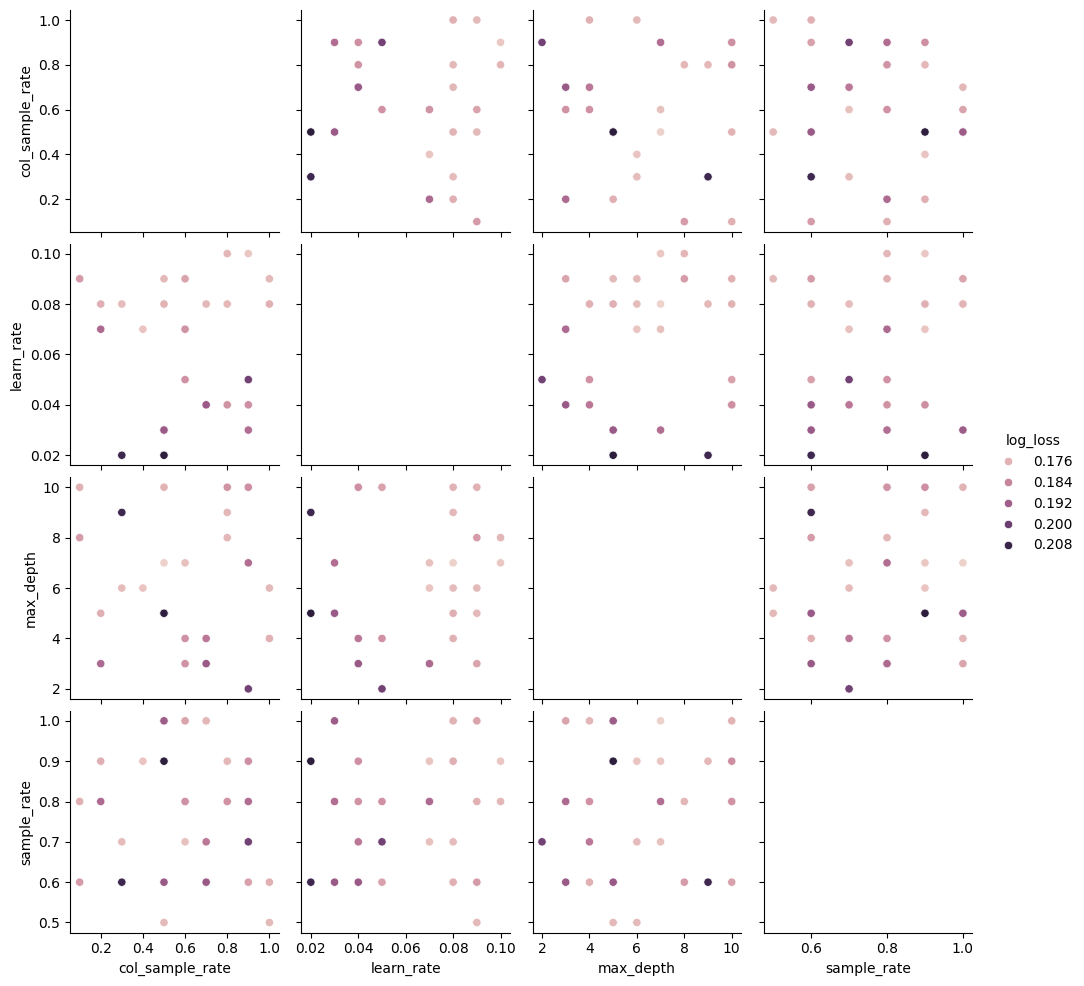

In [121]:

df = pd.DataFrame(list_hyperparameters)
df['log_loss'] = list_logloss

sns.pairplot(df, x_vars=['col_sample_rate', 'learn_rate', 'max_depth', 'sample_rate'], y_vars=['col_sample_rate', 'learn_rate', 'max_depth', 'sample_rate'], hue='log_loss', height=2.5)


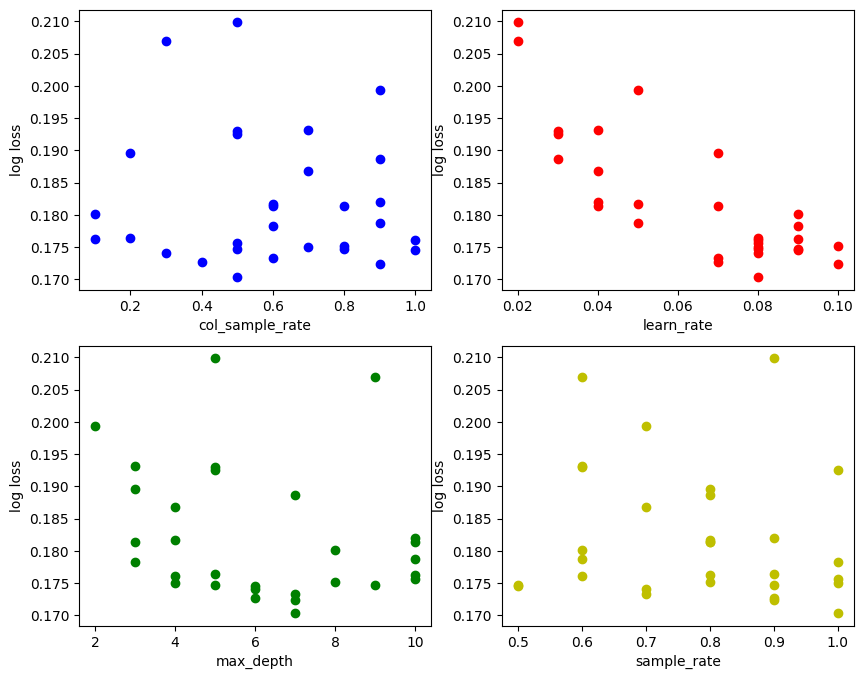

In [122]:

import matplotlib.pyplot as plt

# Extract hyperparameters and log loss from the list of hyperparameters
col_sample_rates = [hyperparameters['col_sample_rate'] for hyperparameters in list_hyperparameters]
learn_rates = [hyperparameters['learn_rate'] for hyperparameters in list_hyperparameters]
max_depths = [hyperparameters['max_depth'] for hyperparameters in list_hyperparameters]
sample_rates = [hyperparameters['sample_rate'] for hyperparameters in list_hyperparameters]
log_losses = [hyperparameters['logloss'] for hyperparameters in list_hyperparameters]

# Create subplots for each hyperparameter
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs[0, 0].plot(col_sample_rates, log_losses, 'bo')
axs[0, 0].set_xlabel('col_sample_rate')
axs[0, 0].set_ylabel('log loss')
axs[0, 1].plot(learn_rates, log_losses, 'ro')
axs[0, 1].set_xlabel('learn_rate')
axs[0, 1].set_ylabel('log loss')
axs[1, 0].plot(max_depths, log_losses, 'go')
axs[1, 0].set_xlabel('max_depth')
axs[1, 0].set_ylabel('log loss')
axs[1, 1].plot(sample_rates, log_losses, 'yo')
axs[1, 1].set_xlabel('sample_rate')
axs[1, 1].set_ylabel('log loss')
plt.show()


**To visualize the hyperparameters in 3D I will import Axes3D**

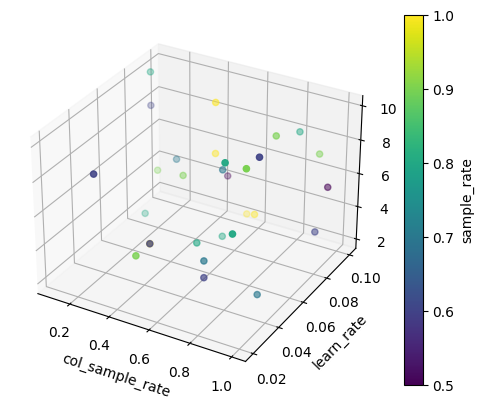

In [123]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Extract hyperparameters and logloss from the list of hyperparameters
col_sample_rates = [hyperparameters['col_sample_rate'] for hyperparameters in list_hyperparameters]
learn_rates = [hyperparameters['learn_rate'] for hyperparameters in list_hyperparameters]
max_depths = [hyperparameters['max_depth'] for hyperparameters in list_hyperparameters]
sample_rates = [hyperparameters['sample_rate'] for hyperparameters in list_hyperparameters]
log_losses = [hyperparameters['logloss'] for hyperparameters in list_hyperparameters]

# Create a 3D scatter plot with color-coded markers for the value of sample_rate
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(col_sample_rates, learn_rates, max_depths, c=sample_rates, cmap='viridis')
ax.set_xlabel('col_sample_rate')
ax.set_ylabel('learn_rate')
ax.set_zlabel('max_depth')
cbar = plt.colorbar(scatter)
cbar.ax.set_ylabel('sample_rate')
plt.show()


**QQ plot**

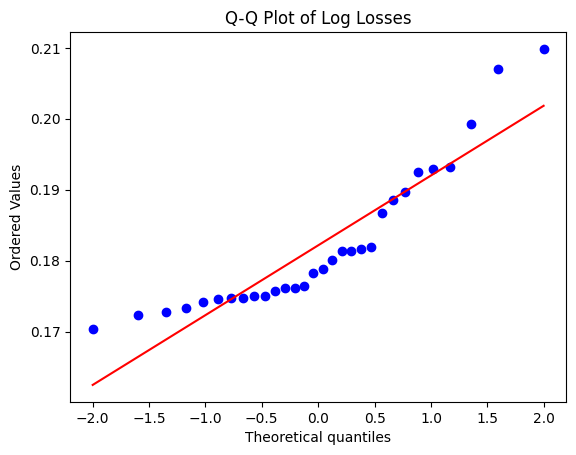

In [124]:
import scipy.stats as stats

# create qq-plot for log_losses
stats.probplot(log_losses, dist='norm', plot=plt)
plt.title('Q-Q Plot of Log Losses')
plt.show()


### **Observations**
In the process of hyperparameter tuning , a grid search was performed over a range of values for four hyperparameters:
col_sample_rate, learn_rate, max_depth, and sample_rate.
A total of 30 combinations of hyperparameters were tested, and for each combination, the logloss was calculated as the evaluation metric.


The best performing model has a logloss of 0.17037053413515685 and the worst performing model has a logloss of 0.2858137078080479.

We can say that the best-performing models have a lower log loss value, while the worst-performing models have a higher log loss value.

This means that the models with log losses closer to 0.17 are performing better than the models with log losses closer to 0.28.

The model with col_sample_rate = 0.5, learn_rate = 0.08, max_depth = 7, sample_rate = 1, and model_id = gbm_grid2_model_42 has the lowest log loss of all the models considered.


The findings indicate that the performance of the model can be greatly influenced by the combination of col_sample_rate, learn_rate, max_depth, and sample_rate, and that making adjustments to these hyperparameters can result in noteworthy improvements in model performance.









# **Answer the following questions for all of the models:**

##**1. Is the relationship significant?**
Ans. Yes, the p value for 'emp.var.rate', 'euribor3m', 'nr.employed', 'poutcome_nonexistent', 'poutcome_success is 0 which is lesser than 0.05 so it is a significant feature.
The relationship is significant when the p value for the predictor variables is less than 0.05,but if it is higher than 0.05 the result is non-significant. From the OLS method, the above mentioned variables have P-Value less that 0.05, hence it can be interpreted that these variables are significant variables and any change to this variables have significant impact on the target(y). Hence for the chosen dataset it can be concluded that the relationship is significant.

##**2. Are any model assumptions violated?**
Ans.No, the model is a multiclassification which make sense to all models in AutoML.

##**3. Is there any multicollinearity in the model?**
Ans. Yes, from the VIF data, we could know that all variables have correlationship with each other except age, duration, campaign, previous variables

Note: If any VIF values are greater than 5 or 10, it may indicate high multicollinearity between the corresponding predictor variable and the other predictor variables in the model.

##**4. In the multivariate models are predictor variables independent of all the other predictor variables?**

To check this relation, correlation matrix can be used, or it can be observed from graphs too whether there is any pattern followed or not. When correlation matrix is computed for the model, it can be observed that euribor3m and poutcome_success are correlated to each other.From the plots have  high correlation between features.


##**5. In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.**
Ans. From the variable importance plot, the most to least important variables are displayed. Duration has the highest variable importance and cons.conf.idx has the least.

##**6. Does the model make sense?**
Ans. To ensure that a model is valid, it is important that it adheres to all the underlying assumptions and has appropriate statistical measures such as p-values and VIF within their expected ranges. When examining the Pair-Plot, it is apparent that each predictor variable exhibits a linear relationship with the target variable. Additionally, the RMSE should be minimized while taking into account the range of values for the target variable. Therefore, when considering all these factors, the model appears to be sound.

##**7. Does regularization help?**
Ans. No,it did not help because it still gave 9.8% error.

##**8. Which independent variables are significant?**
Ans. If the p-value is 0.05 or lower, the result is trumpeted as significant, but if it is higher than 0.05, the result is non-significant

The below independent varibles are significant
1.   emp.var.rate
2.   euribor3m
3.   nr.employed
4.   poutcome_nonexistent
5.   poutcome_success

##**9. Which hyperparameters are important?**
Ans. The best performing model has a logloss of 0.17037053413515685. In this, col_sample_rate of 0.5, learn_rate of 0.08, max_depth of 7.0, and sample_rate of 1.0 are important.


##**10. Coding Professionalism**
Ans.Yes, I take full ownership of my code





















#**Conclusion**

In summary, AutoML aims to automate repetitive tasks in machine learning like pipeline creation and hyperparameter tuning to free up data scientists' time and make the technology more accessible. By working together, AutoML and data scientists can accelerate the ML process and fully utilize the benefits of machine learning. In this project, we utilized H2O AutoML to build a predictive model and observed the effects of Ridge and LASSO regularization on the GLM model. Additionally, we used SHAP summary to study the variable importance and performed hyperparameter tuning using the Random Grid Search method.




# **Citations**
1.Many techniques used in this notebook have been adopted from the following github repositories

Owner - AI Skunkworks Link - https://github.com/aiskunks/Skunks_Skool

Author name - Prof Nik Bear Brown Link - https://github.com/nikbearbrown/

2.Automated Machine Learning with H20 Link - https://towardsdatascience.com/automated-machine-learning-with-h2o-258a2f3a203f

3.H20 AI Auto ML Link - https://docs.h2o.ai/h2o/latest-stable/h2o-docs/index.html

4.Deep drive into H2O's AutoML Link- https://towardsdatascience.com/a-deep-dive-into-h2os-automl-4b1fe51d3f3e

5.Iteratetools link : https://www.geeksforgeeks.org/python-itertools/

6.3D graph : https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html

7.Pandas Documentation : https://pandas.pydata.org/docs/

8.Sklearn Documentation : https://scikit-learn.org/stable/

9.A Complete Guide to Dealing with Missing values in Python

# **Licensing**

Copyright 2024 Yuga Santosh Kanse

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software").The permission allows unrestricted handling of the Software, including but not limited to the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software. Additionally, individuals furnished with the Software have the right to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.